

#### **1. BUSINESS UNDERSTANDING**

#### *Objective*

The main goal is to develop models that can predict the likelihood of Alzheimer’s Disease (AD) and Alzheimer’s Disease Related Dementias (AD/ADRD) as early as possible by leveraging social determinants of health. Early identification allows for timely interventions that could slow cognitive decline, manage symptoms earlier, and improve quality of life for at-risk individuals.

#### *Importance*
Current methods for diagnosing AD/ADRD are often time-consuming, require specialist assessments, and may not be accessible to all, particularly marginalized or underserved groups. By focusing on social determinants of health, this model has the potential to:

Enable proactive healthcare interventions.
Reduce disparities in care by identifying at-risk individuals in marginalized communities.
Improve cost-efficiency in healthcare by addressing conditions earlier in the disease progression.
Business Success Criteria:

The model should accurately identify high-risk individuals for AD/ADRD based on social determinants, which may include demographic, economic, and lifestyle factors.
Predictions should be interpretable, offering insights into which factors significantly contribute to early-onset risk.
The model’s predictions should be reproducible, as DrivenData will verify the submitted models.
Ultimately, the solution should help healthcare providers prioritize early screening and support for individuals flagged by the model.

#### 2. Data Understanding
Data Source:

The dataset is sourced from the Mexican Health and Aging Study (MHAS), a longitudinal survey of adults aged 50 and older in Mexico.
MHAS provides data across various health domains, including demographics, economics, physical limitations, self-reported health, and lifestyle factors.
Data Structure:

train_features.csv: Contains the survey responses for training data, with features collected from both the 2003 and 2012 surveys.

train_labels.csv: Contains the target labels (presence of AD/ADRD) for the training dataset.

test_features.csv: Similar to train_features.csv but without the target label, used for model testing.

Key Data Attributes:

Survey Waves: Data includes responses from the 2003 and 2012 surveys. Some individuals appear in only one survey, while others are present in both.

Feature Columns:
Year-specific columns are suffixed with _03 for 2003 and _12 for 2012.

Year-agnostic columns are not suffixed, as they represent data that is either static over time or measured in both years without difference.

Types of Information Collected:

Demographics (age, gender, etc.)

Economic circumstances (income level, employment status)

Migration history (U.S. migration status, residency status)

Health and physical limitations (self-reported health, ADLs, IADLs)

Lifestyle behaviors (exercise, social activity, household composition)

**Challenges with Data**

Missing Values: Due to the survey format, missing values are present, likely from uncollected data or inapplicable questions.
Temporal Nature: Given data is from two survey years (2003 and 2012), understanding changes over time for an individual could offer insights but adds complexity.
Data Restrictions: External data is not permitted, though pre-trained models can be used if they meet specified conditions.

**Evaluation Considerations**

Models will be evaluated on both their predictive accuracy and the interpretability and completeness of model reports.
To ensure reproducibility, DrivenData will require winning participants to submit modeling code for verification of leaderboard scores.

**IMPORTING THE NECESSARY LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import shap
import warnings
warnings.filterwarnings('ignore')

**DATA LOADING AND INSPECTION**

In [3]:
data = pd.read_csv(r'C:\Users\hp\Documents\Data Science Projects\phase5_capstone\Early-Detection-of-Alzheimer-s-Disease-and-Related-Dementias-Using-Social-Determinants-of-Health\Original data\train_features.csv')
data_label = pd.read_csv(r'C:\Users\hp\Documents\Data Science Projects\phase5_capstone\Early-Detection-of-Alzheimer-s-Disease-and-Related-Dementias-Using-Social-Determinants-of-Health\Original data\train_labels.csv')

In [4]:
#inspecting the datasets
data.head()

,uid,age_03,urban_03,married_03,n_mar_03,edu_gru_03,n_living_child_03,migration_03,glob_hlth_03,adl_dress_03,...,rrelgimp_12,rrfcntx_m_12,rsocact_m_12,rrelgwk_12,a16a_12,a21_12,a22_12,a33b_12,a34_12,j11_12
0,aace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.somewhat important,9.Never,9.Never,0.No,NaN,NaN,NaN,NaN,NaN,Concrete 2
1,aanz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.very important,9.Never,1.Almost every day,0.No,NaN,NaN,NaN,NaN,NaN,Concrete 2
2,aape,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.somewhat important,6.2 or 3 times a month,2.4 or more times a week,0.No,NaN,NaN,NaN,NaN,NaN,"Wood, mosaic, or other covering 1"
3,aard,1. 50–59,"1. 100,000+",3. Widowed,1.0,3. 7–9 years,1. 1 or 2,0.0,4. Fair,0.0,...,1.very important,4.Once a week,9.Never,1.Yes,NaN,NaN,NaN,NaN,No 2,Concrete 2
4,ablr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.very important,3.2 or 3 times a week,3.2 or 3 times a week,0.No,NaN,NaN,NaN,NaN,NaN,"Wood, mosaic, or other covering 1"


In [5]:
data.describe()

,n_mar_03,migration_03,adl_dress_03,adl_walk_03,adl_bath_03,adl_eat_03,adl_bed_03,adl_toilet_03,n_adl_03,iadl_money_03,...,searnings_12,hincome_12,hinc_business_12,hinc_rent_12,hinc_assets_12,hinc_cap_12,rinc_pension_12,sinc_pension_12,a16a_12,a21_12
count,2222.000000,2241.000000,2105.000000,2235.000000,2235.000000,2234.000000,2235.000000,2235.000000,2234.000000,2105.000000,...,2.091000e+03,3.138000e+03,3.187000e+03,3.187000e+03,3187.000000,3.187000e+03,3187.000000,2.091000e+03,24.000000,42.000000
mean,1.134113,0.099063,0.041805,0.017002,0.007159,0.004476,0.026398,0.013423,0.068487,0.005226,...,1.181253e+04,8.824729e+04,3.294321e+04,8.628805e+02,788.202071,3.458739e+04,13850.015689,1.193687e+04,1975.166667,7.833333
std,0.482953,0.298813,0.200191,0.129308,0.084325,0.066770,0.160352,0.115102,0.392793,0.072117,...,6.013394e+04,6.901728e+05,6.520799e+05,3.282440e+04,10314.879890,6.527276e+05,44336.711380,4.705314e+04,20.440086,12.585157
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,-1.900000e+05,0.000000e+00,-3.600000e+05,0.000000,-2.100000e+05,0.000000,0.000000e+00,1942.000000,1.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,1960.000000,1.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,2.000000e+04,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,1972.500000,2.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,6.000000e+04,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,1988.500000,6.750000
max,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,...,1.370000e+06,3.602000e+07,3.600000e+07,1.200000e+06,360000.000000,3.600000e+07,960000.000000,1.200000e+06,2012.000000,52.000000


In [6]:
data_label.head()

,uid,year,composite_score
0,aace,2021,175
1,aanz,2021,206
2,aape,2016,161
3,aape,2021,144
4,aard,2021,104


In [7]:
df= pd.merge(data, data_label, on="uid", how="left")

In [8]:
df.head()

,uid,age_03,urban_03,married_03,n_mar_03,edu_gru_03,n_living_child_03,migration_03,glob_hlth_03,adl_dress_03,...,rsocact_m_12,rrelgwk_12,a16a_12,a21_12,a22_12,a33b_12,a34_12,j11_12,year,composite_score
0,aace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.Never,0.No,NaN,NaN,NaN,NaN,NaN,Concrete 2,2021,175
1,aanz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.Almost every day,0.No,NaN,NaN,NaN,NaN,NaN,Concrete 2,2021,206
2,aape,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.4 or more times a week,0.No,NaN,NaN,NaN,NaN,NaN,"Wood, mosaic, or other covering 1",2016,161
3,aape,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.4 or more times a week,0.No,NaN,NaN,NaN,NaN,NaN,"Wood, mosaic, or other covering 1",2021,144
4,aard,1. 50–59,"1. 100,000+",3. Widowed,1.0,3. 7–9 years,1. 1 or 2,0.0,4. Fair,0.0,...,9.Never,1.Yes,NaN,NaN,NaN,NaN,No 2,Concrete 2,2021,104


In [9]:
df.shape

(4343, 186)

In [10]:
df.info

<bound method DataFrame.info of        uid    age_03     urban_03                    married_03  n_mar_03  \
0     aace       NaN          NaN                           NaN       NaN   
1     aanz       NaN          NaN                           NaN       NaN   
2     aape       NaN          NaN                           NaN       NaN   
3     aape       NaN          NaN                           NaN       NaN   
4     aard  1. 50–59  1. 100,000+                    3. Widowed       1.0   
...    ...       ...          ...                           ...       ...   
4338  zzag  1. 50–59  0. <100,000  1. Married or in civil union       1.0   
4339  zzci  1. 50–59  0. <100,000                    3. Widowed       1.0   
4340  zzci  1. 50–59  0. <100,000                    3. Widowed       1.0   
4341  zzjb  1. 50–59  0. <100,000  1. Married or in civil union       1.0   
4342  zzti  1. 50–59  1. 100,000+  1. Married or in civil union       3.0   

           edu_gru_03 n_living_child_03  mi

In [11]:
df.dtypes

uid                 object
age_03              object
urban_03            object
married_03          object
n_mar_03           float64
                    ...   
a33b_12             object
a34_12              object
j11_12              object
year                 int64
composite_score      int64
Length: 186, dtype: object

**Exploring the test features**

In [12]:
test_features = pd.read_csv(r"C:\Users\hp\Documents\Data Science Projects\phase5_capstone\Early-Detection-of-Alzheimer-s-Disease-and-Related-Dementias-Using-Social-Determinants-of-Health\Original data\test_features.csv")
test_features.head()

,uid,age_03,urban_03,married_03,n_mar_03,edu_gru_03,n_living_child_03,migration_03,glob_hlth_03,adl_dress_03,...,rrelgimp_12,rrfcntx_m_12,rsocact_m_12,rrelgwk_12,a16a_12,a21_12,a22_12,a33b_12,a34_12,j11_12
0,abxu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Wood, mosaic, or other covering 1"
1,aeol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.very important,9.Never,9.Never,1.Yes,NaN,NaN,NaN,NaN,NaN,Concrete 2
2,afnb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.very important,9.Never,3.2 or 3 times a week,1.Yes,NaN,NaN,NaN,NaN,NaN,"Wood, mosaic, or other covering 1"
3,ajfh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.somewhat important,9.Never,5.4 or more times a month,0.No,NaN,NaN,NaN,NaN,NaN,"Wood, mosaic, or other covering 1"
4,ajvq,2. 60–69,"1. 100,000+",1. Married or in civil union,1.0,4. 10+ years,1. 1 or 2,0.0,NaN,NaN,...,2.somewhat important,1.Almost every day,4.Once a week,0.No,NaN,NaN,NaN,NaN,No 2,"Wood, mosaic, or other covering 1"


In [13]:
test_features.shape

(819, 184)

In [14]:
test_features.info

<bound method DataFrame.info of       uid    age_03     urban_03                    married_03  n_mar_03  \
0    abxu       NaN          NaN                           NaN       NaN   
1    aeol       NaN          NaN                           NaN       NaN   
2    afnb       NaN          NaN                           NaN       NaN   
3    ajfh       NaN          NaN                           NaN       NaN   
4    ajvq  2. 60–69  1. 100,000+  1. Married or in civil union       1.0   
..    ...       ...          ...                           ...       ...   
814  zvut       NaN          NaN                           NaN       NaN   
815  zxrm  3. 70–79  0. <100,000  1. Married or in civil union       1.0   
816  zzez       NaN          NaN                           NaN       NaN   
817  zzft  1. 50–59  1. 100,000+  1. Married or in civil union       1.0   
818  zzhd  1. 50–59  0. <100,000  1. Married or in civil union       1.0   

          edu_gru_03 n_living_child_03  migration_03 gl

In [15]:
test_features.isna().sum()

uid             0
age_03        249
urban_03      249
married_03    249
n_mar_03      251
             ... 
a21_12        808
a22_12        809
a33b_12       808
a34_12        277
j11_12         24
Length: 184, dtype: int64

The test features dataset has 819 rowa and 184 columns. There is also presence of missing values.

In [16]:
test_features.describe()

,n_mar_03,migration_03,adl_dress_03,adl_walk_03,adl_bath_03,adl_eat_03,adl_bed_03,adl_toilet_03,n_adl_03,iadl_money_03,...,searnings_12,hincome_12,hinc_business_12,hinc_rent_12,hinc_assets_12,hinc_cap_12,rinc_pension_12,sinc_pension_12,a16a_12,a21_12
count,568.000000,570.000000,542.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,542.000000,...,508.000000,7.730000e+02,7.940000e+02,794.000000,794.000000,7.940000e+02,794.000000,5.080000e+02,6.000000,11.000000
mean,1.165493,0.077193,0.047970,0.012302,0.012302,0.005272,0.038664,0.019332,0.087873,0.009225,...,10196.850394,6.608021e+04,1.010076e+04,2216.624685,367.758186,1.265743e+04,13476.070529,1.039370e+04,1975.833333,6.454545
std,0.535254,0.267132,0.213901,0.110328,0.110328,0.072483,0.192963,0.137811,0.443272,0.095692,...,35871.244519,2.540155e+05,7.190606e+04,35284.803065,4482.643368,8.003225e+04,38708.762304,5.315530e+04,25.103121,9.771015
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-2.000000e+05,0.000000e+00,-200000.000000,0.000000,-2.000000e+05,0.000000,0.000000e+00,1940.000000,1.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,1965.750000,1.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000e+04,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,1971.000000,2.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,5.000000e+04,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,1991.250000,7.000000
max,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,...,310000.000000,6.020000e+06,1.430000e+06,710000.000000,84000.000000,1.430000e+06,480000.000000,1.080000e+06,2011.000000,32.000000


**EXPLORATORY DATA ANALYSIS**

**Demographics**

The plot provide insights into the demographic characteristics of the individuals in your dataset. It shows the distribution of age groups, marital status, locality size, education level, number of living children, and spouse's gender. These distributions can help you understand the sample's diversity.

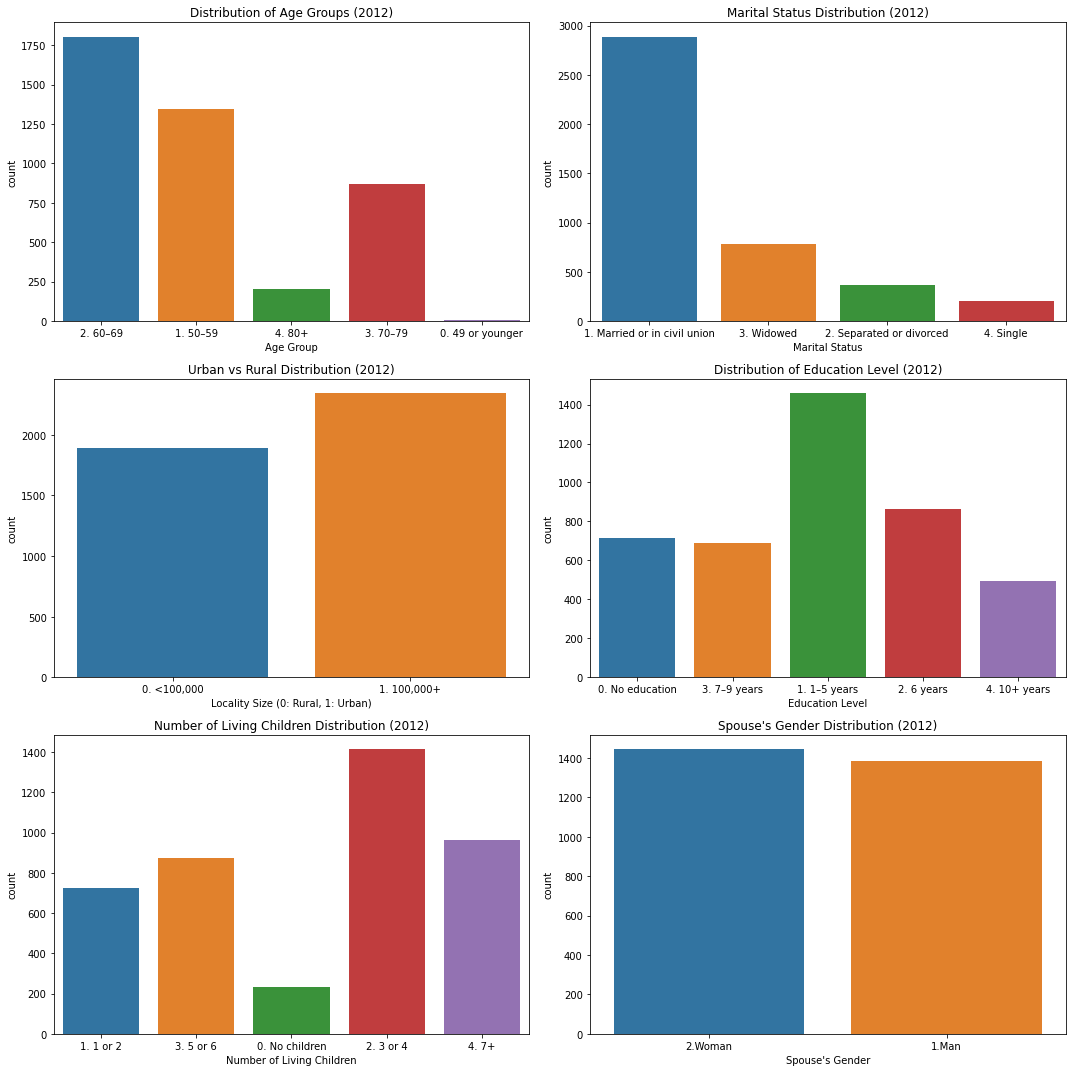

In [17]:
# Plotting demographic variables
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Binned Age Group Distribution
sns.countplot(data=df, x='age_12', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age Groups (2012)')
axes[0, 0].set_xlabel('Age Group')

# Marital Status Distribution
sns.countplot(data=df, x='married_12', ax=axes[0, 1])
axes[0, 1].set_title('Marital Status Distribution (2012)')
axes[0, 1].set_xlabel('Marital Status')

# Urban vs Rural Distribution
sns.countplot(data=df, x='urban_12', ax=axes[1, 0])
axes[1, 0].set_title('Urban vs Rural Distribution (2012)')
axes[1, 0].set_xlabel('Locality Size (0: Rural, 1: Urban)')

# Binned Education Level Distribution
sns.countplot(data=df, x='edu_gru_12', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Education Level (2012)')
axes[1, 1].set_xlabel('Education Level')

# Number of Living Children Distribution
sns.countplot(data=df, x='n_living_child_12', ax=axes[2, 0])
axes[2, 0].set_title('Number of Living Children Distribution (2012)')
axes[2, 0].set_xlabel('Number of Living Children')

# Spouse's Gender Distribution
sns.countplot(data=df, x='sgender_12', ax=axes[2, 1])
axes[2, 1].set_title("Spouse's Gender Distribution (2012)")
axes[2, 1].set_xlabel("Spouse's Gender")

plt.tight_layout()
plt.show()



*Distribution of Age Groups*

The majority of individuals fall into the 60–69 age group, followed by the 50–59 age group.
The 70–79 group has fewer individuals, and the 49 or younger category has the smallest count.

*Marital Status Distribution*

The majority are "Married or in civil union."
Other marital statuses (Widowed, Separated or divorced, and Single) have much smaller counts, with "Widowed" being the largest among them.

*Urban vs. Rural Distribution*

There is a fairly even distribution between rural (population under 100,000) and urban areas (population 101,000 or more), with a slightly higher count in urban areas.

*Distribution of Education Level*

Most individuals have between 1–5 years of education, followed by those with 6–9 years.
The number of people with no education or over 10 years of education is notably smaller.

*Number of Living Children Distribution*

The most common category is having 3 or 4 living children, followed by those with 1 or 2 children.
Fewer individuals have 7 or more children, and the smallest group is those without any children.

*Spouse’s Gender Distribution*

There’s a fairly even distribution between spouses who are men and those who are women, with a slight majority in women.

**HEALTH AND LIFESTYLE**

 The plot focuses on health and lifestyle variables. It explores global health perceptions, limitations in daily living activities, depressive symptoms, health coverage, vaccination status, exercise frequency, and tobacco use. These factors are crucial for understanding the health and wellbeing of individuals.

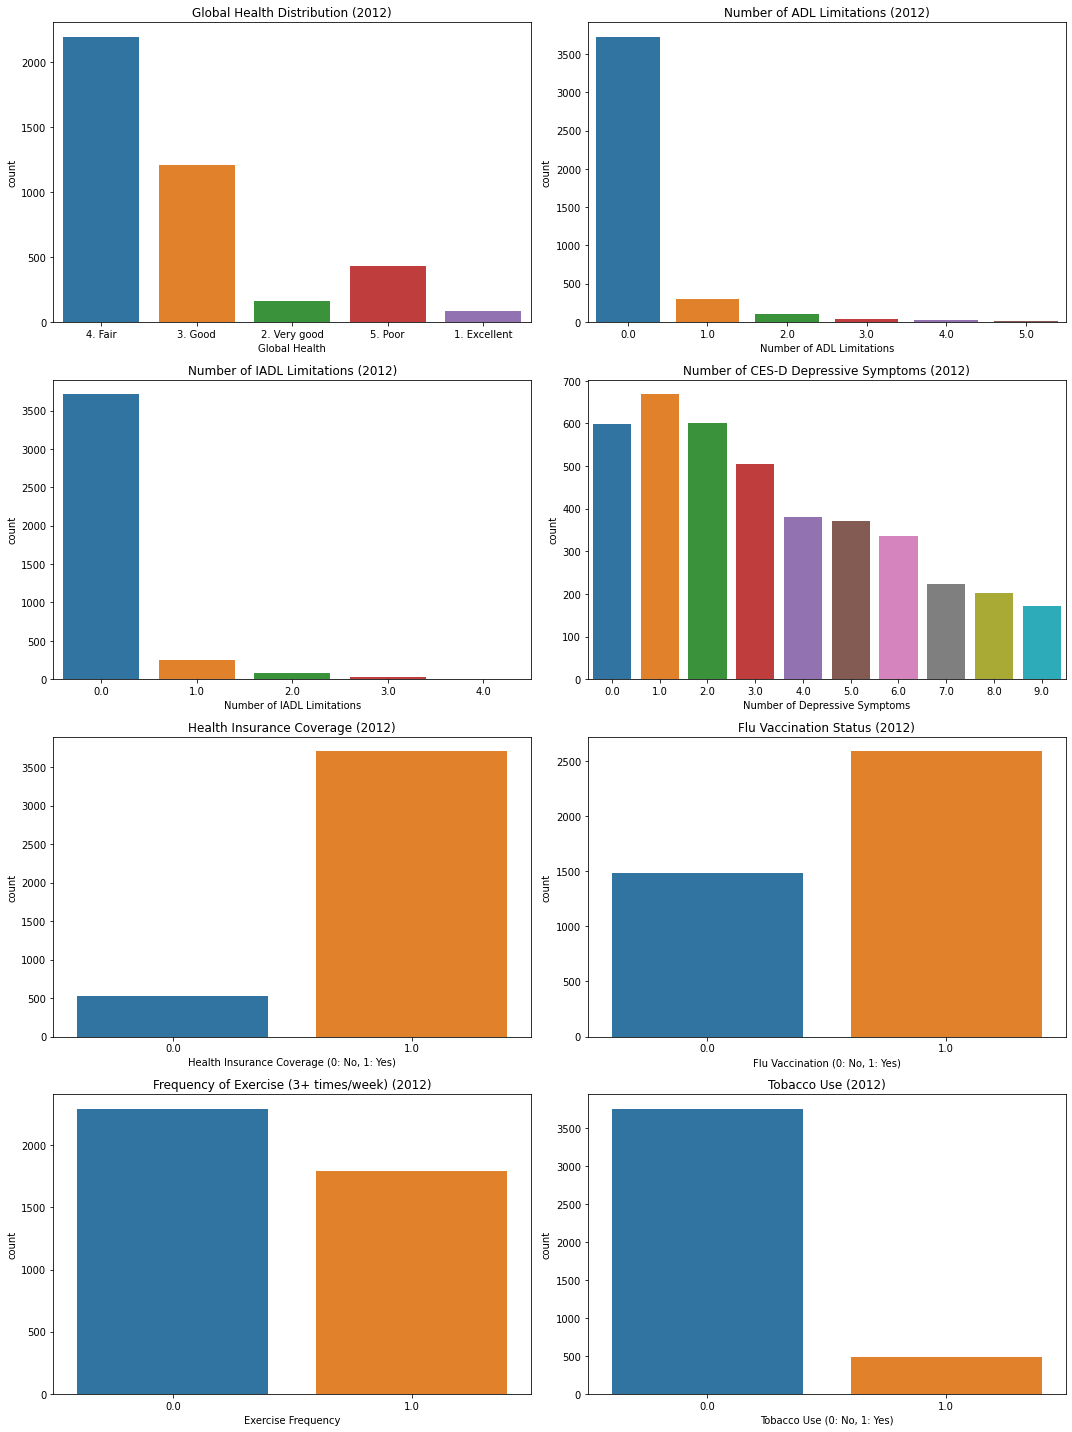

In [18]:
# Plotting health and lifestyle variables
fig, axes = plt.subplots(4, 2, figsize=(15, 20))

# Global Health Distribution
sns.countplot(data=df, x='glob_hlth_12', ax=axes[0, 0])
axes[0, 0].set_title('Global Health Distribution (2012)')
axes[0, 0].set_xlabel('Global Health')

# Activities of Daily Living (ADL) Limitations
sns.countplot(data=df, x='n_adl_12', ax=axes[0, 1])
axes[0, 1].set_title('Number of ADL Limitations (2012)')
axes[0, 1].set_xlabel('Number of ADL Limitations')

# Instrumental Activities of Daily Living (IADL) Limitations
sns.countplot(data=df, x='n_iadl_12', ax=axes[1, 0])
axes[1, 0].set_title('Number of IADL Limitations (2012)')
axes[1, 0].set_xlabel('Number of IADL Limitations')

# Depressive Symptoms Distribution
sns.countplot(data=df, x='n_depr_12', ax=axes[1, 1])
axes[1, 1].set_title('Number of CES-D Depressive Symptoms (2012)')
axes[1, 1].set_xlabel('Number of Depressive Symptoms')

# Health Coverage Distribution
sns.countplot(data=df, x='insured_12', ax=axes[2, 0])
axes[2, 0].set_title('Health Insurance Coverage (2012)')
axes[2, 0].set_xlabel('Health Insurance Coverage (0: No, 1: Yes)')

# Vaccination Status for Flu
sns.countplot(data=df, x='vax_flu_12', ax=axes[2, 1])
axes[2, 1].set_title('Flu Vaccination Status (2012)')
axes[2, 1].set_xlabel('Flu Vaccination (0: No, 1: Yes)')

# Exercise Frequency
sns.countplot(data=df, x='exer_3xwk_12', ax=axes[3, 0])
axes[3, 0].set_title('Frequency of Exercise (3+ times/week) (2012)')
axes[3, 0].set_xlabel('Exercise Frequency')

# Tobacco Use Distribution
sns.countplot(data=df, x='tobacco_12', ax=axes[3, 1])
axes[3, 1].set_title('Tobacco Use (2012)')
axes[3, 1].set_xlabel('Tobacco Use (0: No, 1: Yes)')

plt.tight_layout()
plt.show()


*Global Health Distribution*

Most individuals rate their health as "Fair," followed by "Good."
Fewer people rate their health as "Poor," "Very good," or "Excellent."

*Number of ADL (Activities of Daily Living) Limitations*

The vast majority have no limitations in ADLs, while a small number have one or more limitations.

*Number of IADL (Instrumental Activities of Daily Living) Limitations*

Similar to ADL limitations, most individuals report no IADL limitations, with only a few having one or more limitations.

*Number of CES-D Depressive Symptoms*

There is a spread of depressive symptoms, with most individuals reporting between 0 to 2 symptoms. Higher symptom counts gradually decrease.

*Health Insurance Coverage*

Most individuals have health insurance coverage, with a smaller portion lacking coverage.

*Flu Vaccination Status*

A higher number of individuals received a flu vaccination compared to those who did not.

*Frequency of Exercise (3+ times/week)*

Exercise frequency is fairly balanced, with a slightly larger portion not exercising 3 or more times per week.

*Tobacco Use*

The majority do not use tobacco, with a small portion indicating tobacco use.

**COMPOSITE SCORE ANALYSIS**

The distribution of the composite score, which aggregates various health and lifestyle domains. Analyzing this score can reveal patterns or trends in overall health across the population in your dataset.

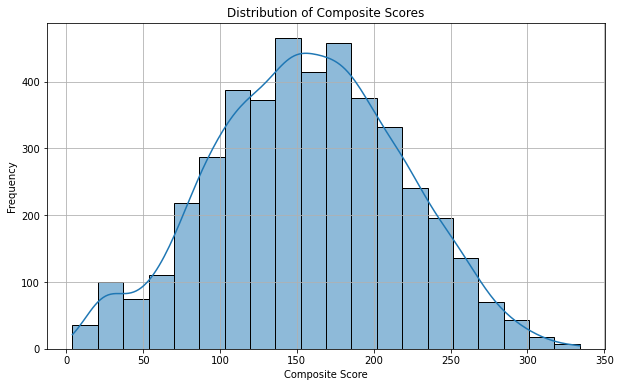

In [19]:
# Plotting composite score distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['composite_score'], bins=20, kde=True)
plt.title('Distribution of Composite Scores')
plt.xlabel('Composite Score')
plt.ylabel('Frequency')
plt.grid()
plt.show()


**Count of Composite Scores by Urban vs. Rural**

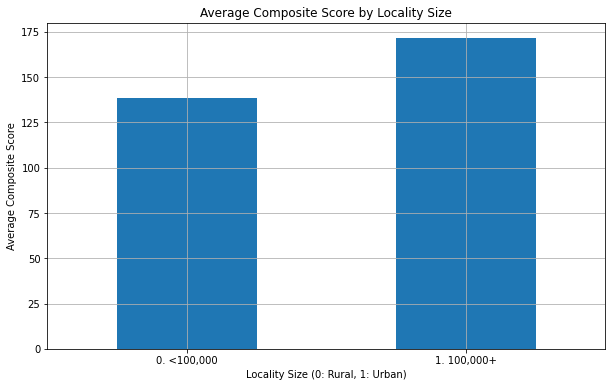

In [20]:
# Bar plot for average composite score by locality size
plt.figure(figsize=(10, 6))
df.groupby('urban_12')['composite_score'].mean().plot(kind='bar')
plt.title('Average Composite Score by Locality Size')
plt.xlabel('Locality Size (0: Rural, 1: Urban)')
plt.ylabel('Average Composite Score')
plt.xticks(rotation=0)
plt.grid()
plt.show()



**Trend Over Years**

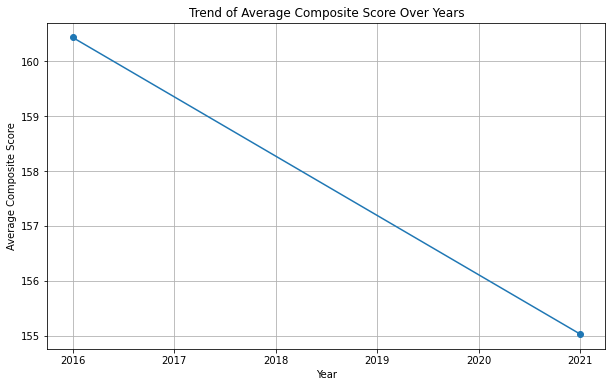

In [21]:
# Line plot for average composite score by year
plt.figure(figsize=(10, 6))
average_score_per_year = df.groupby('year')['composite_score'].mean()
average_score_per_year.plot(kind='line', marker='o')
plt.title('Trend of Average Composite Score Over Years')
plt.xlabel('Year')
plt.ylabel('Average Composite Score')
plt.grid()
plt.show()



The graph shows a trend of the "Average Composite Score" over the years, with a noticeable decline from 2016 to 2021. 
The graph shows a consistent downward trend from 2016 to 2021. The average composite score decreased from above 160 in 2016 to around 155 in 2021, indicating a noticeable decline over these five years.
The decline appears linear, with no major fluctuations or reversals in the trend, suggesting that this decrease might be a result of systemic or gradual changes rather than sudden or isolated events.

**Stacked Bar Plot for Categorical Relationships**

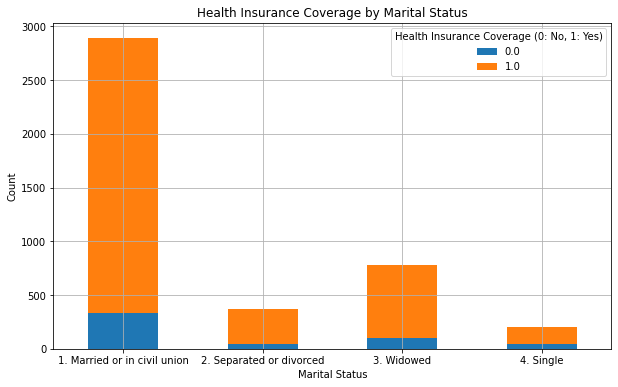

In [22]:
# Stacked bar plot for Marital Status vs. Health Insurance Coverage
marital_health = pd.crosstab(df['married_12'], df['insured_12'])
marital_health.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Health Insurance Coverage by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Health Insurance Coverage (0: No, 1: Yes)')
plt.grid()
plt.show()


This bar chart displays health insurance coverage distribution across different marital statuses. Each marital status category is split by whether individuals have health insurance (1 for "Yes" in orange, and 0 for "No" in blue).

*Key observations*

Most individuals in the "Married or in civil union" category have health insurance, with a relatively small number lacking coverage.

For "Widowed" individuals, a substantial number also have coverage, though the proportion without it is more noticeable compared to married individuals.

"Separated or divorced" and "Single" individuals have lower overall counts, with smaller proportions of insured and uninsured. However, within these groups, insurance coverage is less prevalent than in the married group.

**BOXPLOTS**

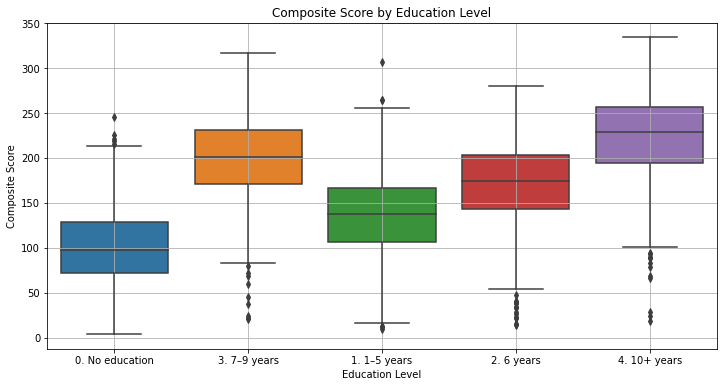

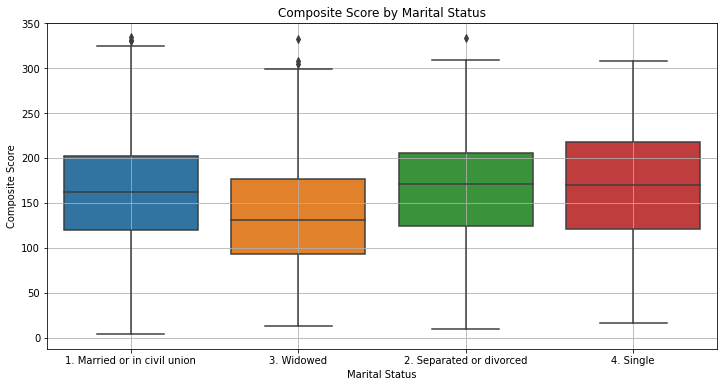

In [23]:
# Boxplot of Composite Score by Education Level
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='edu_gru_12', y='composite_score')
plt.title('Composite Score by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Composite Score')
plt.grid()
plt.show()

# Boxplot of Composite Score by Marital Status
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='married_12', y='composite_score')
plt.title('Composite Score by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Composite Score')
plt.grid()
plt.show()



*Trends Observed*

General Increase in Scores with Education: As the years of education increase, the median composite score also tends to rise. This trend is expected, as higher education levels are generally associated with better performance on assessments.
No Education: The median score is relatively low, with a high variance, meaning there's a broad range of scores even among individuals with no formal education.
1-5 Years of Education: The scores remain relatively low, with a narrower distribution compared to "No Education." The median is slightly higher than that of "No Education," but it’s still low compared to the other categories.
6 Years of Education: This category has a higher median score than the previous two, but it’s still lower than those with more years of education. The range of scores is broader than in the "1-5 years" category.
7-9 Years of Education: There’s a significant jump in median scores here, and the range is relatively wide, indicating variability in scores among individuals with this level of education.
10+ Years of Education: This category has the highest median score, with a fairly wide range and a few high outliers, suggesting that higher education levels are associated with both higher scores and a broader distribution.

*Outliers*

There are several outliers in each category, especially among those with higher education levels. This could represent individuals who perform exceptionally well or poorly compared to the average for their education level.

*Implications of the Findings*

Positive Correlation Between Education and Scores: The chart visually supports the idea that more years of education generally lead to higher composite scores, which aligns with common expectations.
Variability Within Groups: The large range and presence of outliers, particularly in the higher education groups, suggest that while education level is a strong indicator of performance, individual factors (like personal motivation, socio-economic background, or quality of education) may also play a role.

**PAIRPLOTS**

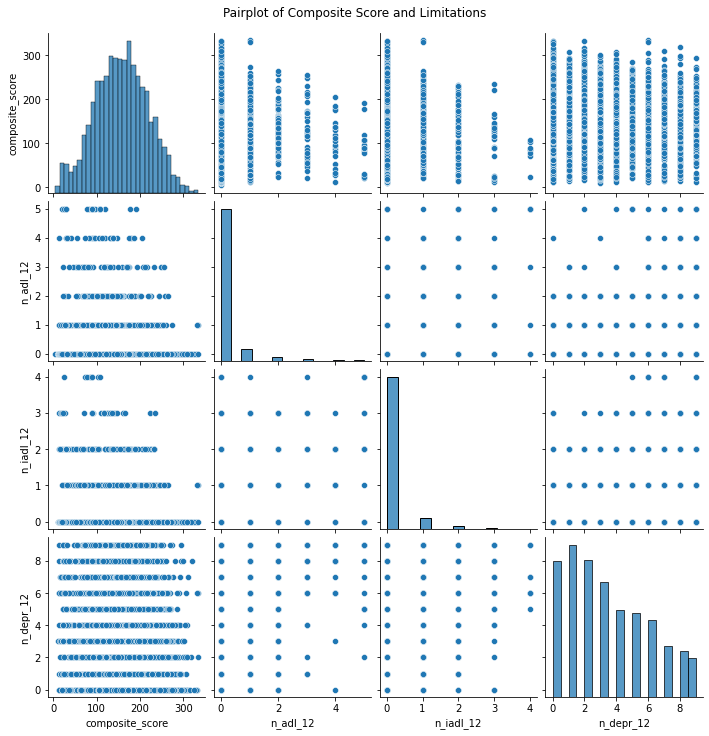

In [24]:
# Pairplot for selected numeric variables
sns.pairplot(df[['composite_score', 'n_adl_12', 'n_iadl_12', 'n_depr_12']])
plt.suptitle('Pairplot of Composite Score and Limitations', y=1.02)
plt.show()


*Histograms (Diagonal)*

Each variable has a histogram along the diagonal, which shows the distribution for that specific variable:
composite_score: The distribution is somewhat bell-shaped, with most values around the middle range and fewer high or low scores.
n_adl_12, n_iadl_12, n_mob_12, and n_depr_12: These show heavily skewed distributions, suggesting that most individuals have low counts for limitations, with only a few individuals having higher counts.

*Scatter Plot Relationships*

The scatter plots display pairwise relationships between variables. Here’s what we can infer:
Composite Score vs. Limitations: In each scatter plot between composite_score and the limitation variables (n_adl_12, n_iadl_12, n_mob_12, n_depr_12), there is a slight downward trend. This suggests a possible negative correlation, where higher numbers of limitations are associated with lower composite scores.
Interrelationships Among Limitations:
The scatter plots between the limitation variables (e.g., n_adl_12 vs. n_iadl_12) show that individuals with limitations in one area tend to have limitations in other areas as well. This suggests that limitations may co-occur; for example, someone with mobility limitations might also have limitations in daily living activities.

*Notable Observations*

Low Composite Scores and Higher Limitations: The downward trend in the scatter plots suggests that individuals with more limitations (in ADLs, IADLs, mobility, or mental health) tend to have lower composite scores. This could indicate that physical or mental limitations negatively impact the performance represented by the composite score.
Clustering at Low Limitation Values: For each limitation variable, most data points are clustered around the lower values (0, 1, or 2), indicating that most individuals have few limitations.

*Implications of the Analysis*

Impact of Limitations on Performance: The observed negative correlation could suggest that physical and mental limitations impact an individual’s composite score, potentially indicating that these limitations reduce the ability to perform well in certain assessments or areas.

Co-Occurrence of Limitations: The interrelationships between limitations could highlight the need for holistic support for individuals with multiple limitations, as addressing one area may benefit others.

#### **DATA PREPROCESSING**
**1.DATA CLEANING**

In [25]:
df.head()

,uid,age_03,urban_03,married_03,n_mar_03,edu_gru_03,n_living_child_03,migration_03,glob_hlth_03,adl_dress_03,...,rsocact_m_12,rrelgwk_12,a16a_12,a21_12,a22_12,a33b_12,a34_12,j11_12,year,composite_score
0,aace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.Never,0.No,NaN,NaN,NaN,NaN,NaN,Concrete 2,2021,175
1,aanz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.Almost every day,0.No,NaN,NaN,NaN,NaN,NaN,Concrete 2,2021,206
2,aape,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.4 or more times a week,0.No,NaN,NaN,NaN,NaN,NaN,"Wood, mosaic, or other covering 1",2016,161
3,aape,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.4 or more times a week,0.No,NaN,NaN,NaN,NaN,NaN,"Wood, mosaic, or other covering 1",2021,144
4,aard,1. 50–59,"1. 100,000+",3. Widowed,1.0,3. 7–9 years,1. 1 or 2,0.0,4. Fair,0.0,...,9.Never,1.Yes,NaN,NaN,NaN,NaN,No 2,Concrete 2,2021,104


In [26]:
#defining a function for missing values percentages
def clean_missing_data(df, threshold=50):
    missing_percentage = df.isnull().mean() * 100
    print("Missing Value Percentage:\n", missing_percentage)
    df_cleaned = df.loc[:, missing_percentage <= threshold]
    
    return df_cleaned


In [27]:
df = clean_missing_data(df)

Missing Value Percentage:
 uid                 0.000000
age_03             33.525213
urban_03           33.479162
married_03         33.479162
n_mar_03           34.123878
                     ...    
a33b_12            98.733594
a34_12             36.863919
j11_12              2.049275
year                0.000000
composite_score     0.000000
Length: 186, dtype: float64


In [28]:
df.shape

(4343, 173)

13 columns have been dropped since they have over 50% of data missing.

In [29]:
#passing the function to the test data
test_features = clean_missing_data(test_features)

Missing Value Percentage:
 uid            0.000000
age_03        30.402930
urban_03      30.402930
married_03    30.402930
n_mar_03      30.647131
                ...    
a21_12        98.656899
a22_12        98.778999
a33b_12       98.656899
a34_12        33.821734
j11_12         2.930403
Length: 184, dtype: float64


In [30]:
test_features.shape

(819, 169)

**Imputing missing values**

In [31]:
#defining a function to impute the data
def impute_missing_values(df):
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    categorical_cols = df.select_dtypes(include=['object']).columns

    num_imputer = SimpleImputer(strategy='median')  # For numerical columns
    cat_imputer = SimpleImputer(strategy='most_frequent')  # For categorical columns

    # Impute missing values
    df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])
    df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

    return df


In [32]:
df = impute_missing_values(df)
df.head()

,uid,age_03,urban_03,married_03,n_mar_03,edu_gru_03,n_living_child_03,migration_03,glob_hlth_03,adl_dress_03,...,rinc_pension_12,sinc_pension_12,rrelgimp_12,rrfcntx_m_12,rsocact_m_12,rrelgwk_12,a34_12,j11_12,year,composite_score
0,aace,1. 50–59,"1. 100,000+",1. Married or in civil union,1.0,1. 1–5 years,2. 3 or 4,0.0,4. Fair,0.0,...,0.0,0.0,2.somewhat important,9.Never,9.Never,0.No,No 2,Concrete 2,2021.0,175.0
1,aanz,1. 50–59,"1. 100,000+",1. Married or in civil union,1.0,1. 1–5 years,2. 3 or 4,0.0,4. Fair,0.0,...,0.0,0.0,1.very important,9.Never,1.Almost every day,0.No,No 2,Concrete 2,2021.0,206.0
2,aape,1. 50–59,"1. 100,000+",1. Married or in civil union,1.0,1. 1–5 years,2. 3 or 4,0.0,4. Fair,0.0,...,0.0,0.0,2.somewhat important,6.2 or 3 times a month,2.4 or more times a week,0.No,No 2,"Wood, mosaic, or other covering 1",2016.0,161.0
3,aape,1. 50–59,"1. 100,000+",1. Married or in civil union,1.0,1. 1–5 years,2. 3 or 4,0.0,4. Fair,0.0,...,0.0,0.0,2.somewhat important,6.2 or 3 times a month,2.4 or more times a week,0.No,No 2,"Wood, mosaic, or other covering 1",2021.0,144.0
4,aard,1. 50–59,"1. 100,000+",3. Widowed,1.0,3. 7–9 years,1. 1 or 2,0.0,4. Fair,0.0,...,0.0,0.0,1.very important,4.Once a week,9.Never,1.Yes,No 2,Concrete 2,2021.0,104.0


**Mapping Categorical Columns in the Data**

In this section, we convert categorical data into numerical data through mapping. We will first identify the catergorical columns the create a mapping dictionary for each of the categorical variables. The variables will be assigned numbers eg 1, 2, 3, 4 according to how they appear on the dataset

In [33]:
#extracting categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"Unique values in '{col}': {df[col].unique()}")


Unique values in 'uid': ['aace' 'aanz' 'aape' ... 'zzci' 'zzjb' 'zzti']
Unique values in 'age_03': ['1. 50–59' '3. 70–79' '2. 60–69' '0. 49 or younger' '4. 80+']
Unique values in 'urban_03': ['1. 100,000+' '0. <100,000']
Unique values in 'married_03': ['1. Married or in civil union' '3. Widowed' '4. Single'
 '2. Separated or divorced']
Unique values in 'edu_gru_03': ['1. 1–5 years' '3. 7–9 years' '0. No education' '2. 6 years'
 '4. 10+ years']
Unique values in 'n_living_child_03': ['2. 3 or 4' '1. 1 or 2' '3. 5 or 6' '0. No children' '4. 7+']
Unique values in 'glob_hlth_03': ['4. Fair' '5. Poor' '3. Good' '1. Excellent' '2. Very good']
Unique values in 'employment_03': ['1. Currently Working' '3. Dedicated to household chores'
 '2. Currently looking for work'
 '4. Retired, incapacitated, or does not work']
Unique values in 'age_12': ['2. 60–69' '1. 50–59' '4. 80+' '3. 70–79' '0. 49 or younger']
Unique values in 'urban_12': ['0. <100,000' '1. 100,000+']
Unique values in 'married_12': ['

**Understanding the categorical columns**

Unique Identifiers (uid): This column contains unique IDs for each participant, represented by combinations of letters (e.g., 'aace', 'aanz', 'zzti').

Age Groups for 2003 (age_03): This column categorizes participants into age ranges, with values like '50–59', '70–79', and so on, up to '80+'.

Urban or Rural Classification in 2003 (urban_03): Indicates the size of the locality where participants live, with values '100,000+' (urban) and '<100,000' (rural).

Marital Status in 2003 (married_03): Records participants’ marital status, with options like 'Married or in civil union', 'Widowed', 'Single', and 'Separated or divorced'.

Education Level in 2003 (edu_gru_03): Reflects education level, ranging from 'No education' to '10+ years' of schooling.

Number of Living Children in 2003 (n_living_child_03): Groups the number of children participants have, with options like 'No children', '1 or 2', '3 or 4', etc.

Global Health Status in 2003 (glob_hlth_03): Assesses self-reported health, from 'Excellent' to 'Poor'.

Employment Status in 2003 (employment_03): Describes employment status, including options like 'Currently Working', 'Dedicated to household chores', 'Currently looking for work', and 'Retired'.

Age Groups for 2012 (age_12): Similar to age_03, but updated for 2012.

Urban or Rural Classification in 2012 (urban_12): Identifies locality size in 2012.

Marital Status in 2012 (married_12): Marital status updated for 2012, with similar categories as in 2003.

Education Level in 2012 (edu_gru_12): Education level categories for 2012.

Number of Living Children in 2012 (n_living_child_12): Number of children in 2012, with similar groupings.

Global Health Status in 2012 (glob_hlth_12): Health status updated for 2012.

Body Mass Index (BMI) Category in 2012 (bmi_12): Categorizes BMI from 'Underweight' to 'Morbidly obese'.

Decision-making in Family Matters in 2012 (decis_famil_12): Describes who holds decision-making power, whether the 'Respondent', 'Spouse', or both equally.

Decision-making in Personal Matters in 2012 (decis_personal_12): Reflects the level of personal decision-making autonomy, from 'A lot' to 'None'.

Employment Status in 2012 (employment_12): Employment status in 2012.

Satisfaction with Ideal Life in 2012 (satis_ideal_12): Shows respondents' agreement level with their ideal life status, from 'Agrees' to 'Disagrees'.

Satisfaction with Excelling in Life in 2012 (satis_excel_12): Assesses satisfaction with life achievements.

Satisfaction with a Fine Life in 2012 (satis_fine_12): Reflects respondents’ general life satisfaction.

Important Things in Life in 2012 (cosas_imp_12): Agreement level with life priorities.

Wouldn't Change Life in 2012 (wouldnt_change_12): Reflects satisfaction with one’s current life, indicating if participants would or wouldn’t change their circumstances.

Memory Status in 2012 (memory_12): Self-assessed memory quality.

Gender (ragender and sgender_03, sgender_12): Indicates gender as 'Man' or 'Woman'.

Mother's Education Level (rameduc_m, rafeduc_m): Describes the education level of the mother, from 'None' to 'More than primary'.

Importance of Religion in 2003 and 2012 (rrelgimp_03, rrelgimp_12): Reflects how important religion is to the respondent, ranging from 'very important' to 'not important'.

Religious Participation in 2012 (rrelgwk_12): Indicates whether respondents participate in religious gatherings.

Frequency of Contact with Friends in 2012 (rrfcntx_m_12): Shows how often respondents meet friends, from 'Never' to 'Almost every day'.

Social Activity Frequency in 2012 (rsocact_m_12): Describes the frequency of social activity involvement.

House Material in 2012 (j11_12): Indicates the main material of the house, with categories like 'Concrete', 'Wood', and 'Mud'.

In [34]:
# Define mappings for each categorical column
mappings = {
    'age_03': {
        '1. 50–59': 1,
        '3. 70–79': 3,
        '2. 60–69': 2,
        '0. 49 or younger': 0,
        '4. 80+': 4
    },
    'urban_03': {
        '1. 100,000+': 1,
        '0. <100,000': 0
    },
    'married_03': {
        '3. Widowed': 3,
        '1. Married or in civil union': 1,
        '4. Single': 4,
        '2. Separated or divorced': 2
    },
    'edu_gru_03': {
        '3. 7–9 years': 3,
        '1. 1–5 years': 1,
        '0. No education': 0,
        '2. 6 years': 2,
        '4. 10+ years': 4
    },
    'n_living_child_03': {
        '1. 1 or 2': 1,
        '3. 5 or 6': 3,
        '0. No children': 0,
        '2. 3 or 4': 2,
        '4. 7+': 4
    },
    'glob_hlth_03': {
        '4. Fair': 4,
        '5. Poor': 5,
        '3. Good': 3,
        '1. Excellent': 1,
        '2. Very good': 2
    },
    'employment_03': {
        '3. Dedicated to household chores': 3,
        '1. Currently Working': 1,
        '2. Currently looking for work': 2,
        '4. Retired, incapacitated, or does not work': 4
    },
    'age_12': {
        '2. 60–69': 2,
        '1. 50–59': 1,
        '4. 80+': 4,
        '3. 70–79': 3,
        '0. 49 or younger': 0
    },
    'urban_12': {
        '0. <100,000': 0,
        '1. 100,000+': 1
    },
    'married_12': {
        '1. Married or in civil union': 1,
        '3. Widowed': 3,
        '2. Separated or divorced': 2,
        '4. Single': 4
    },
    'edu_gru_12': {
        '0. No education': 0,
        '3. 7–9 years': 3,
        '1. 1–5 years': 1,
        '2. 6 years': 2,
        '4. 10+ years': 4
    },
    'n_living_child_12': {
        '1. 1 or 2': 1,
        '3. 5 or 6': 3,
        '0. No children': 0,
        '2. 3 or 4': 2,
        '4. 7+': 4
    },
    'glob_hlth_12': {
        '4. Fair': 4,
        '3. Good': 3,
        '2. Very good': 2,
        '5. Poor': 5,
        '1. Excellent': 1
    },
    'bmi_12': {
        '3. Overweight': 3,
        '4. Obese': 4,
        '2. Normal weight': 2,
        '1. Underweight': 1,
        '5. Morbidly obese': 5
    },
    'decis_famil_12': {
        '2. Approximately equal weight': 2,
        '3. Spouse': 3,
        '1. Respondent': 1
    },
    'decis_personal_12': {
        '1. A lot': 1,
        '2. A little': 2,
        '3. None': 3
    },
    'employment_12': {
        '1. Currently Working': 1,
        '2. Currently looking for work': 2,
        '3. Dedicated to household chores': 3,
        '4. Retired, incapacitated, or does not work': 4
    },
    'satis_ideal_12': {
        '3. Disagrees': 3,
        '1. Agrees': 1,
        '2. Neither agrees nor disagrees': 2
    },
    'satis_excel_12': {
        '3. Disagrees': 3,
        '2. Neither agrees nor disagrees': 2,
        '1. Agrees': 1
    },
    'satis_fine_12': {
        '1. Agrees': 1,
        '3. Disagrees': 3,
        '2. Neither agrees nor disagrees': 2
    },
    'cosas_imp_12': {
        '1. Agrees': 1,
        '2. Neither agrees nor disagrees': 2,
        '3. Disagrees': 3
    },
    'wouldnt_change_12': {
        '3. Disagrees': 3,
        '1. Agrees': 1,
        '2. Neither agrees nor disagrees': 2
    },
    'memory_12': {
        '2. Very good': 2,
        '4. Fair': 4,
        '3. Good': 3,
        '5. Poor': 5,
        '1. Excellent': 1
    },
    'ragender': {
        '1.Man': 1,
        '2.Woman': 2
    },
    'rameduc_m': {
        '1.None': 1,
        '2.Some primary': 2,
        '3.Primary': 3,
        '4.More than primary': 4
    },
    'rafeduc_m': {
        '1.None': 1,
        '2.Some primary': 2,
        '4.More than primary': 4,
        '3.Primary': 3
    },
    'sgender_03': {
        '2.Woman': 2,
        '1.Man': 1
    },
    'rrelgimp_03': {
        '1.very important': 1,
        '2.somewhat important': 2,
        '3.not important': 3
    },
    'sgender_12': {
        '2.Woman': 2,
        '1.Man': 1
    },
    'rjlocc_m_12': {
        '6.Workers in Agriculture, Livestock, Forestry, and Fishing': 6,
        '18.Safety and Security Personnel': 18,
        '8.Artisans and Workers in Production, Repair, Maintenance': 8,
        '14.Merchants and Sales Representatives': 14,
        '17.Domestic Workers': 17,
        '9.Operators of Fixed Machinery and Equipment for Ind. Production': 9,
        '15.Traveling Salespeople and Traveling Salespeople of Services': 15,
        '16.Workers in the Service Industry': 16,
        '4.Workers in Art, Shows, and Sports': 4,
        '3.Educators': 3,
        '12.Department Heads/Coordinators/Supervisors in Admin and Service Activities': 12,
        '10.Asst/Laborers etc in Ind. Production, Repair, Maintenance': 10,
        '1.Professionals': 1,
        '13.Administrative Support Staff': 13,
        '11.Drivers and Asst Drivers of Mobile Machinery and Transport Vehicles': 11,
        '7.Bosses/Supervisors etc in Artistic, Ind. Production, Repair, Maintenance Activities': 7,
        '2.Technicians': 2,
        '5.Officials and Directors Public, Private, and Social Sectors': 5
    },
    'rrelgimp_12': {
        '2.somewhat important': 2,
        '1.very important': 1,
        '3.not important': 3
    },
    'rrfcntx_m_12': {
        '9.Never': 9,
        '6.2 or 3 times a month': 6,
        '4.Once a week': 4,
        '3.2 or 3 times a week': 3,
        '8.Almost Never, sporadic': 8,
        '1.Almost every day': 1,
        '2.4 or more times a week': 2,
        '7.Once a month': 7,
        '5.4 or more times a month': 5
    },
    'rsocact_m_12': {
        '9.Never': 9,
        '1.Almost every day': 1,
        '2.4 or more times a week': 2,
        '3.2 or 3 times a week': 3,
        '4.Once a week': 4,
        '8.Almost Never, sporadic': 8,
        '5.2 or 3 times a month': 5,
        '6.Once a month': 6,
        '7.4 or more times a month': 7
    },
    'rrelgwk_12': {
        '0.No': 0,
        '1.Yes': 1
    },
    'a34_12': {
        'No 2': 0,
        'Yes 1': 1
    },
    'j11_12': {
        'Wood, mosaic, or other covering 1': 1,
        'Concrete 2': 2,
        'Mud 3': 3
    }
}


From the above output, we can see that some features have this format: ['0. No Education, 1. 1-5Years]. We will deal with thes columns by mapping them.

In [35]:
#applying the mappings to the columns 
for column, mapping in mappings.items():
    df[column] = df[column].map(mapping)

In [36]:
#investigating the columns
df.head()

,uid,age_03,urban_03,married_03,n_mar_03,edu_gru_03,n_living_child_03,migration_03,glob_hlth_03,adl_dress_03,...,rinc_pension_12,sinc_pension_12,rrelgimp_12,rrfcntx_m_12,rsocact_m_12,rrelgwk_12,a34_12,j11_12,year,composite_score
0,aace,1,1,1,1.0,1,2,0.0,4,0.0,...,0.0,0.0,2,9,9.0,0,0,2,2021.0,175.0
1,aanz,1,1,1,1.0,1,2,0.0,4,0.0,...,0.0,0.0,1,9,1.0,0,0,2,2021.0,206.0
2,aape,1,1,1,1.0,1,2,0.0,4,0.0,...,0.0,0.0,2,6,2.0,0,0,1,2016.0,161.0
3,aape,1,1,1,1.0,1,2,0.0,4,0.0,...,0.0,0.0,2,6,2.0,0,0,1,2021.0,144.0
4,aard,1,1,3,1.0,3,1,0.0,4,0.0,...,0.0,0.0,1,4,9.0,1,0,2,2021.0,104.0


In [37]:
df = impute_missing_values(df)

In [38]:
df.head()

,uid,age_03,urban_03,married_03,n_mar_03,edu_gru_03,n_living_child_03,migration_03,glob_hlth_03,adl_dress_03,...,rinc_pension_12,sinc_pension_12,rrelgimp_12,rrfcntx_m_12,rsocact_m_12,rrelgwk_12,a34_12,j11_12,year,composite_score
0,aace,1.0,1.0,1.0,1.0,1.0,2.0,0.0,4.0,0.0,...,0.0,0.0,2.0,9.0,9.0,0.0,0.0,2.0,2021.0,175.0
1,aanz,1.0,1.0,1.0,1.0,1.0,2.0,0.0,4.0,0.0,...,0.0,0.0,1.0,9.0,1.0,0.0,0.0,2.0,2021.0,206.0
2,aape,1.0,1.0,1.0,1.0,1.0,2.0,0.0,4.0,0.0,...,0.0,0.0,2.0,6.0,2.0,0.0,0.0,1.0,2016.0,161.0
3,aape,1.0,1.0,1.0,1.0,1.0,2.0,0.0,4.0,0.0,...,0.0,0.0,2.0,6.0,2.0,0.0,0.0,1.0,2021.0,144.0
4,aard,1.0,1.0,3.0,1.0,3.0,1.0,0.0,4.0,0.0,...,0.0,0.0,1.0,4.0,9.0,1.0,0.0,2.0,2021.0,104.0


In [39]:
df.dtypes

uid                 object
age_03             float64
urban_03           float64
married_03         float64
n_mar_03           float64
                    ...   
rrelgwk_12         float64
a34_12             float64
j11_12             float64
year               float64
composite_score    float64
Length: 173, dtype: object

In [40]:
#making a copy of the dataset
modelling_df = df.copy()

In [41]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Dropping the unique identifier 'uid' 
modelling_df = modelling_df.drop(columns=['uid'])

# Instantiate encoders
onehot_encoder = OneHotEncoder(sparse=False, drop='first')  # drop first to avoid multicollinearity
ordinal_encoder = OrdinalEncoder()

**Checking for cardinality**

In [42]:
categorical_cols = [
    'edu_gru_03', 'edu_gru_12', 'employment_03', 'employment_12', 'rjlocc_m_03', 'rjlocc_m_12',
    'rjobend_reason_03', 'rjobend_reason_12', 'glob_hlth_03', 'glob_hlth_12', 'bmi_03', 'bmi_12',
    'decis_famil_03', 'decis_famil_12', 'decis_personal_03', 'decis_personal_12', 'satis_ideal_12',
    'satis_excel_12', 'satis_fine_12', 'cosas_imp_12', 'wouldnt_change_12', 'memory_12', 'rrelgimp_03',
    'rrelgimp_12', 'rrfcntx_m_12', 'rsocact_m_12', 'rrelgwk_12', 'a33b_12', 'a34_12', 'a22_12', 'j11_12'
]

# Checking cardinality by counting unique values
cardinality = {col: modelling_df[col].nunique() for col in categorical_cols if col in df.columns}
high_cardinality = {k: v for k, v in cardinality.items() if v > 10} 

print("\nColumns with High Cardinality:")
print(high_cardinality)


Columns with High Cardinality:
{'rjlocc_m_12': 18}


In [43]:
#frequency encoding for the high cardinality columns
freq_encoding = modelling_df['rjlocc_m_12'].value_counts()

# Map the frequency values to the original column
modelling_df['rjlocc_m_12_encoded_freq'] = modelling_df['rjlocc_m_12'].map(freq_encoding)

# Handle missing values if any
modelling_df['rjlocc_m_12_encoded_freq'].fillna(0, inplace=True)  # Fill with 0 if category not present in original data

# Check and print to verify encoding
print("Frequency Encoded 'rjlocc_m_12':\n", modelling_df[['rjlocc_m_12', 'rjlocc_m_12_encoded_freq']].head())


Frequency Encoded 'rjlocc_m_12':
    rjlocc_m_12  rjlocc_m_12_encoded_freq
0          6.0                       368
1         18.0                        70
2          8.0                      2505
3          8.0                      2505
4          8.0                      2505


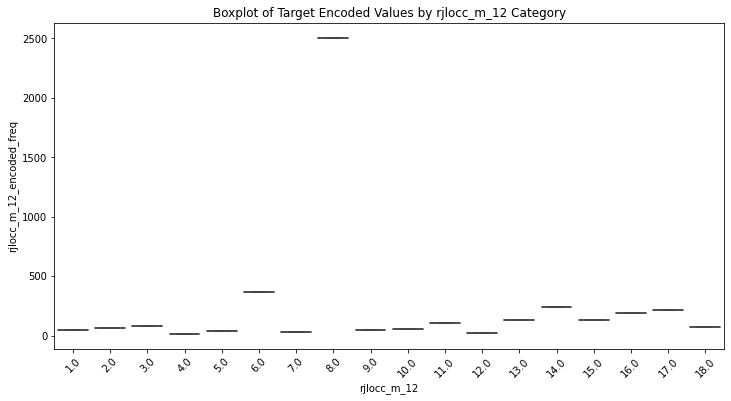

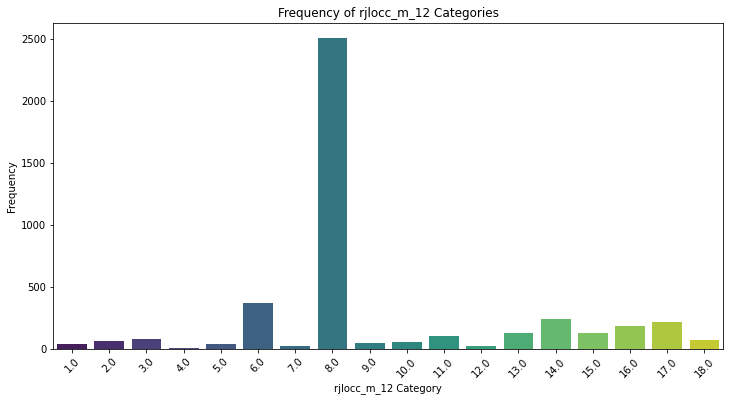

In [44]:
# Plotting Target Encoded values
plt.figure(figsize=(12, 6))
sns.boxplot(data=modelling_df, x='rjlocc_m_12', y='rjlocc_m_12_encoded_freq')
plt.title('Boxplot of Target Encoded Values by rjlocc_m_12 Category')
plt.xticks(rotation=45)
plt.show()

# Plotting Frequency Encoded values
plt.figure(figsize=(12, 6))
sns.barplot(x=freq_encoding.index, y=freq_encoding.values, palette="viridis")
plt.title('Frequency of rjlocc_m_12 Categories')
plt.xticks(rotation=45)
plt.xlabel('rjlocc_m_12 Category')
plt.ylabel('Frequency')
plt.show()

**PLOT SUMMARY**
1. Boxplot of Target Encoded Values by rjloc_m_12 Category:

This boxplot represents the distribution of target-encoded values across the different categories of rjloc_m_12.

Most categories have relatively low target-encoded values, as seen by the clusters near zero.

Categories 4 and 6 have significantly higher median values and/or outliers compared to other categories.

This plot indicates that some categories may be associated with higher values, suggesting variability in target encoding across categories.

2. Frequency of rjloc_m_12 Categories:

This bar chart shows the frequency count for each category in rjloc_m_12.

Category 7 has a noticeably high count (around 2500), dominating the frequency distribution.

Other categories have much lower counts, with category 6 being the second most frequent.

The uneven distribution in category frequencies suggests that category 7 is much more common than the others, which could impact model behavior if the variable is used in prediction.

*Implications*
The large frequency imbalance in rjloc_m_12 (with category 7 dominating) could bias models if not handled carefully.
Categories 4 and 6 have higher target-encoded values, potentially indicating that these categories could have a stronger relationship with the target variable than other categories.


In [45]:
modelling_df.drop(columns=['rjlocc_m_12'], inplace=True)

In [46]:
#defining ordinal and nominal columns
ordinal_columns = [
    'age_03', 'married_03', 'edu_gru_03', 'n_living_child_03', 
    'glob_hlth_03', 'employment_03', 'age_12', 'married_12', 
    'edu_gru_12', 'n_living_child_12', 'glob_hlth_12', 'bmi_12', 
    'decis_famil_12', 'decis_personal_12', 'employment_12', 
    'satis_ideal_12', 'satis_excel_12', 'satis_fine_12', 
    'cosas_imp_12', 'wouldnt_change_12', 'memory_12', 
    'rrelgimp_03', 'rrelgimp_12', 'rrfcntx_m_12', 'rsocact_m_12'
]

nominal_columns = [
    'urban_03', 'sgender_03', 'ragender', 'rameduc_m', 
    'rafeduc_m', 'urban_12', 'sgender_12', 'rjlocc_m_12_encoded_freq', 
    'rrelgwk_12', 'a34_12', 'j11_12'
]

Since we have already defined norminal and ordinal columns from the data, we'll apply scaling to the ordinal columns and apply one hot encoding to the norminal columns

In [47]:
# One-hot encoding only the nominal columns
df_encoded = pd.get_dummies(modelling_df, columns=nominal_columns, drop_first=True)

# scaling the ordinal columns
scaler = StandardScaler()
modelling_df[ordinal_columns] = scaler.fit_transform(modelling_df[ordinal_columns])

#viewing the encoded dataset
modelling_df.head()

,age_03,urban_03,married_03,n_mar_03,edu_gru_03,n_living_child_03,migration_03,glob_hlth_03,adl_dress_03,adl_walk_03,...,sinc_pension_12,rrelgimp_12,rrfcntx_m_12,rsocact_m_12,rrelgwk_12,a34_12,j11_12,year,composite_score,rjlocc_m_12_encoded_freq
0,-0.4304,1.0,-0.401112,1.0,-0.357742,-0.372870,0.0,0.291619,0.0,0.0,...,0.0,1.382460,1.150444,0.807862,0.0,0.0,2.0,2021.0,175.0,368
1,-0.4304,1.0,-0.401112,1.0,-0.357742,-0.372870,0.0,0.291619,0.0,0.0,...,0.0,-0.559961,1.150444,-1.432587,0.0,0.0,2.0,2021.0,206.0,70
2,-0.4304,1.0,-0.401112,1.0,-0.357742,-0.372870,0.0,0.291619,0.0,0.0,...,0.0,1.382460,0.227468,-1.152531,0.0,0.0,1.0,2016.0,161.0,2505
3,-0.4304,1.0,-0.401112,1.0,-0.357742,-0.372870,0.0,0.291619,0.0,0.0,...,0.0,1.382460,0.227468,-1.152531,0.0,0.0,1.0,2021.0,144.0,2505
4,-0.4304,1.0,2.359629,1.0,1.571088,-1.389425,0.0,0.291619,0.0,0.0,...,0.0,-0.559961,-0.387850,0.807862,1.0,0.0,2.0,2021.0,104.0,2505


**CHECKING FOR MULTICOLLINEARITY**

In [48]:
print("Checking for missing values in the dataframe:")
print(modelling_df.isnull().sum())  # Check for missing values
print("Checking for infinite values in the dataframe:")
print(np.isinf(modelling_df).sum())  # Check for infinite values

Checking for missing values in the dataframe:
age_03                      0
urban_03                    0
married_03                  0
n_mar_03                    0
edu_gru_03                  0
                           ..
a34_12                      0
j11_12                      0
year                        0
composite_score             0
rjlocc_m_12_encoded_freq    0
Length: 172, dtype: int64
Checking for infinite values in the dataframe:
age_03                      0
urban_03                    0
married_03                  0
n_mar_03                    0
edu_gru_03                  0
                           ..
a34_12                      0
j11_12                      0
year                        0
composite_score             0
rjlocc_m_12_encoded_freq    0
Length: 172, dtype: int64


In [49]:
modelling_df_cleaned = modelling_df.replace([np.inf, -np.inf], np.nan).dropna()
modelling_df_cleaned

,age_03,urban_03,married_03,n_mar_03,edu_gru_03,n_living_child_03,migration_03,glob_hlth_03,adl_dress_03,adl_walk_03,...,sinc_pension_12,rrelgimp_12,rrfcntx_m_12,rsocact_m_12,rrelgwk_12,a34_12,j11_12,year,composite_score,rjlocc_m_12_encoded_freq
0,-0.4304,1.0,-0.401112,1.0,-0.357742,-0.372870,0.0,0.291619,0.0,0.0,...,0.0,1.382460,1.150444,0.807862,0.0,0.0,2.0,2021.0,175.0,368
1,-0.4304,1.0,-0.401112,1.0,-0.357742,-0.372870,0.0,0.291619,0.0,0.0,...,0.0,-0.559961,1.150444,-1.432587,0.0,0.0,2.0,2021.0,206.0,70
2,-0.4304,1.0,-0.401112,1.0,-0.357742,-0.372870,0.0,0.291619,0.0,0.0,...,0.0,1.382460,0.227468,-1.152531,0.0,0.0,1.0,2016.0,161.0,2505
3,-0.4304,1.0,-0.401112,1.0,-0.357742,-0.372870,0.0,0.291619,0.0,0.0,...,0.0,1.382460,0.227468,-1.152531,0.0,0.0,1.0,2021.0,144.0,2505
4,-0.4304,1.0,2.359629,1.0,1.571088,-1.389425,0.0,0.291619,0.0,0.0,...,0.0,-0.559961,-0.387850,0.807862,1.0,0.0,2.0,2021.0,104.0,2505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338,-0.4304,0.0,-0.401112,1.0,-0.357742,1.660241,0.0,1.859069,0.0,0.0,...,0.0,-0.559961,1.150444,-0.592419,1.0,0.0,2.0,2021.0,152.0,2505
4339,-0.4304,0.0,2.359629,1.0,-0.357742,-1.389425,0.0,0.291619,0.0,0.0,...,0.0,-0.559961,1.150444,0.807862,1.0,0.0,2.0,2016.0,140.0,2505
4340,-0.4304,0.0,2.359629,1.0,-0.357742,-1.389425,0.0,0.291619,0.0,0.0,...,0.0,-0.559961,1.150444,0.807862,1.0,0.0,2.0,2021.0,121.0,2505
4341,-0.4304,0.0,-0.401112,1.0,-1.322156,-0.372870,0.0,-1.275832,0.0,0.0,...,0.0,-0.559961,1.150444,0.807862,0.0,0.0,2.0,2021.0,32.0,368


In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate VIF after encoding
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
    return vif_data

# Select only numeric columns after encoding
modelling_df_cleaned = modelling_df_cleaned.select_dtypes(include=['float', 'int'])

# Calculate VIF
vif_df = calculate_vif(modelling_df_cleaned)
print(vif_df.sort_values(by="VIF", ascending=False))


               Feature       VIF
17        iadl_shop_03       inf
12          adl_bed_03       inf
76       iadl_meals_12       inf
77           n_iadl_12       inf
74        iadl_meds_12       inf
..                 ...       ...
48         out_proc_03  1.173890
97              bmi_12  1.169489
116  decis_personal_12  1.133936
115     decis_famil_12  1.124647
107        out_proc_12  1.119922

[172 rows x 2 columns]


Certain features show an infinite Variance Inflation Factor (VIF), it indicates perfect multicollinearity, meaning that some features are exact linear combinations of others.
The following are the steps to handle multicollinearity:
1.  **Drop one of the highly correlated features**: If two features are highly correlated, we can drop one of them. This is a simple and effective way to handle multicollinearity
2.  **Use dimensionality reduction techniques**: Techniques like PCA (Principal Component Analysis)
3.  **Use regularization techniques**: Regularization techniques like Ridge regression or Lasso regression
4.  **Use feature selection techniques**: Techniques like recursive feature elimination (RFE) or mutual information can be used to select the most relevant features.
5.  **Use correlation matrix**: You can use the correlation matrix to identify the highly correlated features


**Dropping the highly correlated features**

In [51]:
# Check correlation matrix to identify pairs with high correlations
corr_matrix = modelling_df_cleaned.corr().abs()

# Upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than a threshold (e.g., 0.95)
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop these features
df_reduced = modelling_df_cleaned.drop(columns=to_drop)

In [52]:
# Calculate VIF
vif_df = calculate_vif(df_reduced)
print(vif_df.sort_values(by="VIF", ascending=False))

               Feature       VIF
19           n_iadl_03       inf
12          adl_bed_03       inf
74        iadl_meds_12       inf
75        iadl_shop_12       inf
18       iadl_meals_03       inf
..                 ...       ...
116  decis_personal_12  1.133917
148     hinc_assets_03  1.128753
115     decis_famil_12  1.124139
107        out_proc_12  1.119798
158     hinc_assets_12  1.079185

[170 rows x 2 columns]


**FEATURE ENGINEERING**

In [53]:
#making a copy of the dataset
data_df = df.copy()

In [54]:
data_df.head()

,uid,age_03,urban_03,married_03,n_mar_03,edu_gru_03,n_living_child_03,migration_03,glob_hlth_03,adl_dress_03,...,rinc_pension_12,sinc_pension_12,rrelgimp_12,rrfcntx_m_12,rsocact_m_12,rrelgwk_12,a34_12,j11_12,year,composite_score
0,aace,1.0,1.0,1.0,1.0,1.0,2.0,0.0,4.0,0.0,...,0.0,0.0,2.0,9.0,9.0,0.0,0.0,2.0,2021.0,175.0
1,aanz,1.0,1.0,1.0,1.0,1.0,2.0,0.0,4.0,0.0,...,0.0,0.0,1.0,9.0,1.0,0.0,0.0,2.0,2021.0,206.0
2,aape,1.0,1.0,1.0,1.0,1.0,2.0,0.0,4.0,0.0,...,0.0,0.0,2.0,6.0,2.0,0.0,0.0,1.0,2016.0,161.0
3,aape,1.0,1.0,1.0,1.0,1.0,2.0,0.0,4.0,0.0,...,0.0,0.0,2.0,6.0,2.0,0.0,0.0,1.0,2021.0,144.0
4,aard,1.0,1.0,3.0,1.0,3.0,1.0,0.0,4.0,0.0,...,0.0,0.0,1.0,4.0,9.0,1.0,0.0,2.0,2021.0,104.0


1. Handling Repeated Measures Across Years

For each feature measured in 2003 and 2012, calculate averages, differences, and ratios to capture change over time.

In [55]:
# List of variables with 2003 and 2012 suffixes
year_vars = [col for col in data_df.columns if col.endswith('_03') or col.endswith('_12')]

# Create average, difference, and ratio columns
for var in year_vars:
    base_var = var[:-3]
    if f"{base_var}_03" in data_df.columns and f"{base_var}_12" in data_df.columns:
        data_df[f"{base_var}_avg"] = (data_df[f"{base_var}_03"] + data_df[f"{base_var}_12"]) / 2
        data_df[f"{base_var}_diff"] = data_df[f"{base_var}_12"] - data_df[f"{base_var}_03"]
        data_df[f"{base_var}_ratio"] = data_df[f"{base_var}_12"] / (data_df[f"{base_var}_03"] + 1e-5)  # Add epsilon to avoid division by zero


2. Tranforming Categorical features

In [56]:
# Categorical features
categorical_features = ['age_03', 'age_12', 'married_03', 'married_12', 'edu_gru_03', 'edu_gru_12', 
                        'glob_hlth_03', 'glob_hlth_12', 'decis_personal_12', 
                        'employment_03', 'employment_12']

data_df = pd.get_dummies(data_df, columns=categorical_features, drop_first=True)


3. Feature Engineering for Health and Lifestyle Scores

Calculate summary statistics for ADLs, IADLs, depressive symptoms, and illnesses.

In [57]:
# ADL and IADL scores
data_df['adl_score_avg'] = data_df[['n_adl_03', 'n_adl_12']].mean(axis=1)
data_df['iadl_score_avg'] = data_df[['n_iadl_03', 'n_iadl_12']].mean(axis=1)

# Depressive symptoms score
data_df['depressive_symptoms_score'] = data_df[['n_depr_03', 'n_depr_12']].mean(axis=1)

# Health-related illnesses
data_df['illnesses_avg'] = data_df[['n_illnesses_03', 'n_illnesses_12']].mean(axis=1)


4. Combine Lifestyle Activities into a Composite Score

Aggregate lifestyle activities in 2012 (activities only recorded in 2012) as a composite feature.

In [58]:
lifestyle_activities = [
    'care_adult_12', 'care_child_12', 'volunteer_12', 'attends_class_12', 'attends_club_12', 
    'reads_12', 'games_12', 'table_games_12', 'comms_tel_comp_12', 'act_mant_12', 'tv_12', 
    'sewing_12'
]
data_df['lifestyle_score'] = data_df[lifestyle_activities].sum(axis=1)


5. Income-Related Features

Aggregate income sources into total income, and create new features for income ratios.

In [59]:
# Total income for 2003 and 2012
data_df['total_income_03'] = data_df[['hincome_03', 'hinc_business_03', 'hinc_rent_03', 'hinc_assets_03', 'hinc_cap_03']].sum(axis=1)
data_df['total_income_12'] = data_df[['hincome_12', 'hinc_business_12', 'hinc_rent_12', 'hinc_assets_12', 'hinc_cap_12']].sum(axis=1)

# Income growth ratio
data_df['income_growth_ratio'] = data_df['total_income_12'] / (data_df['total_income_03'] + 1e-5)


6. Create a Health Insurance Score

Summarize health insurance types and calculate insurance count for each

In [60]:
# Health insurance count for 2003 and 2012
insurance_03 = ['imss_03', 'issste_03', 'pem_def_mar_03', 'insur_private_03', 'insur_other_03']
insurance_12 = ['imss_12', 'issste_12', 'pem_def_mar_12', 'insur_private_12', 'insur_other_12', 'seg_pop_12']

data_df['insurance_count_03'] = data_df[insurance_03].sum(axis=1)
data_df['insurance_count_12'] = data_df[insurance_12].sum(axis=1)
data_df['insurance_count_avg'] = data_df[['insurance_count_03', 'insurance_count_12']].mean(axis=1)


7. Drop Redundant Columns

Removing original columns that have been used to create these engineered features.

In [61]:
# Drop original year-specific columns
drop_columns = [col for col in data_df.columns if col.endswith('_03') or col.endswith('_12')]
data_df = data_df.drop(columns=drop_columns)


**MODELLING**

In [62]:
# Separate features and target variable
X = df_reduced.drop(columns=['composite_score', 'year'])
y = df_reduced['composite_score']

**BASELINE MODELS**

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models to test
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

# Dictionary to store RMSE results
rmse_results = {}

# Loop over each model, train it, and calculate RMSE
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    rmse_results[model_name] = rmse
    print(f"{model_name} RMSE: {rmse:.4f}")

# Print all RMSE results
print("\nRMSE Results for All Models:")
for model_name, rmse in rmse_results.items():
    print(f"{model_name}: {rmse:.4f}")



Linear Regression RMSE: 41.4251
Random Forest RMSE: 37.8807
Decision Tree RMSE: 51.0786
Support Vector Regressor RMSE: 55.3807
K-Nearest Neighbors RMSE: 54.7411

RMSE Results for All Models:
Linear Regression: 41.4251
Random Forest: 37.8807
Decision Tree: 51.0786
Support Vector Regressor: 55.3807
K-Nearest Neighbors: 54.7411


Based on the RMSE results, Random Forest has the lowest RMSE, followed by Linear Regression. This suggests that Random Forest is currently performing the best. We will work on improving the performance of Linear Regression and Random Forest

#### **HYPERPARAMETER TUNING THE RANDOM FOREST MODEL**

The baseline Random forest model had an RMSE of: Random Forest: 37.8070.

In [64]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Initialize Random Forest model
rf = RandomForestRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and best RMSE
best_rf = grid_search.best_estimator_
best_rf_rmse = np.sqrt(-grid_search.best_score_)
print(f"Best Random Forest RMSE after tuning: {best_rf_rmse:.4f}")
print(f"Best Parameters: {grid_search.best_params_}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Random Forest RMSE after tuning: 39.4531
Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


*Baseline Model Performance*

The RMSE (Root Mean Squared Error) for the baseline Random Forest model was 37.8070.
This is the initial performance of the model before any parameter adjustments.
Hyperparameter Tuning Performance:

After tuning, the best RMSE achieved was 39.4531, which is higher than the baseline RMSE, meaning the tuned model has a slightly higher error (lower performance) than the baseline.

The best parameters found through tuning are:
1. max_depth: 20
2. max_features: 'sqrt'
3. min_samples_leaf: 1
4. min_samples_split: 2
5. n_estimators: 200

Even though these parameters were selected as the best based on cross-validation, they didn’t improve the RMSE compared to the baseline model. This showa that the model may have been overfitting to the training folds during cross-validation, leading to suboptimal performance on the test data.

**Next steps**
1. Adjusting the parameter grid by using randomized grid search which samples randomly.
2. Using cross validation to prevent overfitting.

**RANDOMIZED SEARCH CV**

In [65]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

# Define a wider parameter grid for Randomized Search
param_dist = {
    'n_estimators': stats.randint(100, 500),
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': stats.randint(2, 10),
    'min_samples_leaf': stats.randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# RandomizedSearchCV with more iterations to explore parameter space
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=100,  
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)
best_rf_random = random_search.best_estimator_
best_rf_random_rmse = np.sqrt(-random_search.best_score_)
print(f"Best Random Forest RMSE after Randomized Search: {best_rf_random_rmse:.4f}")
print(f"Best Parameters (Randomized Search): {random_search.best_params_}")


Best Random Forest RMSE after Randomized Search: 39.5417
Best Parameters (Randomized Search): {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 199}


Model Tuning and Performance:
Baseline Model: The default Random Forest model has the lowest RMSE (37.8070), indicating that the initial model already performed fairly well with default parameters.

Grid Search CV: The best parameters from Grid Search result in an RMSE of 39.4531, which is slightly worse than the baseline RMSE. This could indicate that a constrained parameter set in Grid Search (e.g., limiting max_depth to 20) might not have been the best choice for this particular dataset.

Randomized Search CV: The RMSE from Randomized Search is 39.5417, which is almost identical to Grid Search and slightly worse than both Grid Search and the baseline. The use of bootstrap=False and a higher min_samples_leaf (3) may have contributed to this slight increase in RMSE, suggesting that the new parameter choices might not have fit the data as well

The baseline model is still performing better than both the Grid Search CV and Randomized Search CV models.

While both hyperparameter tuning methods (Grid Search and Randomized Search) showed improvement over the default Random Forest model in terms of fine-tuning parameters, they both slightly underperformed compared to the baseline model.


**Cross Validation to prevent overfittiing**

In [66]:
from sklearn.model_selection import cross_val_score

# Use cross-validation with Random Forest model
rf_model = RandomForestRegressor(n_estimators=200, max_depth=20, min_samples_split=2, min_samples_leaf=1)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Print average RMSE from cross-validation
print(f"Cross-Validated RMSE: {np.sqrt(-cv_scores.mean()):.4f}")

Cross-Validated RMSE: 39.5111


*Analysis*

Baseline Random Forest: The baseline model achieved the lowest RMSE at 37.8070, meaning the default settings were already performing well on this dataset.

Grid Search CV: The Grid Search CV RMSE is 39.4531, which is slightly worse than the baseline model (37.8070). This suggests that the hyperparameter tuning in Grid Search didn't lead to significant improvements for this dataset. In fact, the constrained parameters may have caused overfitting or underfitting.

Randomized Search CV: The Randomized Search CV RMSE is 39.5417, which is very close to Grid Search but slightly worse. It is still higher than the baseline, indicating that the Randomized Search did not improve the model performance.

Cross-Validation RMSE: The Cross-Validated RMSE of 39.5315 provides an estimate of model performance based on k-fold cross-validation, which is used to assess the model's ability to generalize to unseen data. This result is almost identical to the results from both Grid and Randomized Search CV.

*Insights and Conclusion*

Model Stability: The Cross-Validation RMSE (39.5315) closely aligns with the results of the hyperparameter tuning methods, which suggests that the model's performance is stable across different data splits.

Overfitting Check: The close values between the cross-validation RMSE and the tuned models (Grid Search and Randomized Search) indicate that the model isn't overfitting to the training data but is consistently performing on unseen data as well.

Baseline vs. Tuned Models: The baseline model still performs the best with an RMSE of 37.8070, which means that the default hyperparameters might actually suit this dataset better than the ones chosen during the hyperparameter search process

**Feature Importance Analysis and Feature Selection**

Analyzing feature importance from the tuned Random Forest model to identify any less important features. Removing low-importance features can reduce noise and improve generalization.

In [67]:
from sklearn.feature_selection import SelectFromModel

# Feature selection based on the feature importances
selector = SelectFromModel(best_rf_random, threshold="median", prefit=True)
X_train_reduced = selector.transform(X_train)
X_test_reduced = selector.transform(X_test)

# Train Random Forest on the reduced feature set
best_rf_random.fit(X_train_reduced, y_train)
y_pred_reduced = best_rf_random.predict(X_test_reduced)

# Calculate RMSE, MAE, and R-squared for the reduced model
reduced_rmse = np.sqrt(mean_squared_error(y_test, y_pred_reduced))
reduced_mae = mean_absolute_error(y_test, y_pred_reduced)
reduced_r2 = r2_score(y_test, y_pred_reduced)

# Print the results
print(f"Random Forest RMSE with Feature Selection: {reduced_rmse:.4f}")
print(f"Random Forest MAE with Feature Selection: {reduced_mae:.4f}")
print(f"Random Forest R² with Feature Selection: {reduced_r2:.4f}")



Random Forest RMSE with Feature Selection: 37.4484
Random Forest MAE with Feature Selection: 29.0130
Random Forest R² with Feature Selection: 0.5976


*Random Forest RMSE with Feature Selection: 37.4484*

An RMSE of 37.4484 means that, on average, the model's predictions are off by approximately 37.45 units from the true values. A lower RMSE generally indicates better performance, so this value suggests that the model is making relatively accurate predictions.

*Random Forest MAE with Feature Selection: 29.0130*

An MAE of 29.0130 means that, on average, the model's predictions are off by 29.01 units. This is similar to the RMSE but does not penalize larger errors as much as RMSE does. This indicates that while the model is somewhat accurate.

*Random Forest R² with Feature Selection: 0.5976*

An R² of 0.5976 suggests that approximately 60% of the variance in the target variable is explained by the model. This is a moderate performance, indicating that the model is capturing a good portion of the variability but still leaves about 40% unexplained, which suggests that there are other factors or complexities not captured by the model.

**Identifying the selected features**

In [68]:
# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X_train.columns[selected_indices]

# Visualizing the feature importances
importances = best_rf_random.feature_importances_[selected_indices]
indices = np.argsort(importances)[::-1]

# Create a DataFrame for better visualization
feature_importances_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_importances_df

,Feature,Importance
12,happy_03,0.164244
2,n_mar_03,0.071021
9,n_iadl_03,0.049896
0,age_03,0.039579
31,adl_dress_12,0.034784
41,enjoy_12,0.032300
34,adl_bed_12,0.032220
36,iadl_meals_12,0.031568
40,lonely_12,0.029945
13,lonely_03,0.029419


High-Importance Features (Importance > 0.05):
These features play a crucial role in the model's predictions, contributing significantly to the outcome:

happy_03 (0.164244): Reflects the happiness level in 2003, which is the most influential feature.
n_mar_03 (0.071021): Represents the number of marriages in 2003.
n_iadl_03 (0.049896): Denotes the number of instrumental activities of daily living (IADLs) in 2003, related to independence in daily tasks.
Medium-Importance Features (Importance 0.02 - 0.05):
These features have moderate influence, contributing to the model but not as heavily as the high-importance ones: 4. age_03 (0.039579): The age of the individual in 2003, a key demographic factor. 5. adl_dress_12 (0.034784): Reflects the ability to dress oneself in 2012, indicating independence in physical tasks. 6. enjoy_12 (0.032300): Measures enjoyment in 2012, potentially relating to well-being or life satisfaction. 7. adl_bed_12 (0.032220): Assesses the ability to get out of bed in 2012, another marker for physical independence. 8. iadl_meals_12 (0.031568): Relates to the ability to manage meals independently in 2012. 9. lonely_12 (0.029945): Measures loneliness in 2012, a potential indicator of social isolation.

Low-Importance Features (Importance < 0.02):
These features contribute less to the model, though they still provide some value in refining predictions: 10. lonely_03 (0.029419): Measures loneliness in 2003, also important but less so than the 2012 version. 11. insur_other_03 (0.026620): Represents other types of insurance in 2003. 12. edu_gru_03 (0.023900): Indicates education group in 2003. 13. hard_12 (0.022479): Refers to difficulty with physical tasks in 2012, affecting overall health. 14. insured_03 (0.017304): Represents whether the individual was insured in 2003. 15. adl_walk_12 (0.014630): The ability to walk independently in 2012.

Minor-Contribution Features (Importance < 0.01):
These features have minimal impact but are still part of the model's decision-making process: 16. arthritis_03 (0.014067): Presence of arthritis in 2003, affecting health. 17. depressed_03 (0.013644): Depressive symptoms in 2003. 18. adl_walk_03 (0.013241): Walking ability in 2003. 19. restless_12 (0.013204): Measures restlessness in 2012. 20. urban_03 (0.011651): Indicates whether the individual lived in an urban area in 2003.

Least-Important Features (Importance < 0.01):
These features have the least impact on the model and are considered the least important in making predictions: 21. n_illnesses_03 (0.011027): The number of illnesses in 2003. 22. enjoy_03 (0.009991): Enjoyment level in 2003. 23. iadl_shop_03 (0.009199): Ability to shop independently in 2003. 24. visit_med_03 (0.009190): Frequency of medical visits in 2003. 25. migration_12 (0.007950): Indicates if the individual migrated in 2012. 26. employment_03 (0.007663): Employment status in 2003. 27. cancer_03 (0.007502): Whether the individual had cancer in 2003.

**FEATURE ENGINEERING FOR THE SELECTED FEATURES**

In [69]:
from sklearn.preprocessing import PolynomialFeatures

# Feature Engineering: Polynomial Features 
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_reduced)
X_test_poly = poly.transform(X_test_reduced)

# Train Random Forest with Polynomial Features
best_rf_random.fit(X_train_poly, y_train)
y_pred_poly = best_rf_random.predict(X_test_poly)

# Evaluate the model with Polynomial Features
poly_rmse = np.sqrt(mean_squared_error(y_test, y_pred_poly))
poly_mae = mean_absolute_error(y_test, y_pred_poly)
poly_r2 = r2_score(y_test, y_pred_poly)

print(f"Random Forest with Polynomial Features RMSE: {poly_rmse:.4f}")
print(f"Random Forest with Polynomial Features MAE: {poly_mae:.4f}")
print(f"Random Forest with Polynomial Features R²: {poly_r2:.4f}")

Random Forest with Polynomial Features RMSE: 37.4615
Random Forest with Polynomial Features MAE: 29.0974
Random Forest with Polynomial Features R²: 0.5973


The model performs relatively same as the initial one with selected features.

#### **MODELING USING TRANSFORMED DATA**

Transforming the data from wide to long by assigning the year a different column named time.
We also apply scaling to the user id.

In [70]:
#making a copy of the data and labelling it 'data_md'
data_md = df.copy()

In [71]:
# Check for duplicates in the identifier column
duplicates = data_md.duplicated(subset=['uid'])
print(data_md[duplicates])


       uid  age_03  urban_03  married_03  n_mar_03  edu_gru_03  \
3     aape     1.0       1.0         1.0       1.0         1.0   
14    adtd     1.0       1.0         1.0       1.0         1.0   
16    aehw     3.0       0.0         1.0       1.0         0.0   
21    afls     1.0       0.0         1.0       1.0         0.0   
34    aiac     1.0       1.0         1.0       1.0         1.0   
...    ...     ...       ...         ...       ...         ...   
4330  zyed     1.0       1.0         3.0       1.0         2.0   
4332  zyni     1.0       1.0         1.0       1.0         1.0   
4334  zytb     1.0       1.0         1.0       1.0         2.0   
4338  zzag     1.0       0.0         1.0       1.0         1.0   
4340  zzci     1.0       0.0         3.0       1.0         1.0   

      n_living_child_03  migration_03  glob_hlth_03  adl_dress_03  ...  \
3                   2.0           0.0           4.0           0.0  ...   
14                  2.0           0.0           4.0        

The duplicates in the identifier column is because some of the patients have their data taken twice over the years. This posses no risk in the dataset since they are all important features in the modelling process.

*Converting the data to long format:*

In [72]:
# Convert wide to long format
data_long = pd.wide_to_long(
    data_md,
    stubnames=[
        'age', 'urban', 'married', 'n_mar', 'edu_gru', 'n_living_child', 'migration', 
        'glob_hlth', 'adl_dress', 'adl_walk', 'adl_bath', 'adl_eat', 'adl_bed', 'adl_toilet', 
        'n_adl', 'iadl_money', 'iadl_meds', 'iadl_shop', 'iadl_meals', 'n_iadl', 'depressed', 
        'hard', 'restless', 'happy', 'lonely', 'enjoy', 'sad', 'tired', 'energetic', 'n_depr', 
        'cesd_depressed', 'hypertension', 'diabetes', 'resp_ill', 'arthritis', 'hrt_attack', 
        'stroke', 'cancer', 'n_illnesses', 'bmi', 'exer_3xwk', 'alcohol', 'tobacco', 
        'test_chol', 'test_tuber', 'test_diab', 'test_pres', 'hosp', 'visit_med', 
        'out_proc', 'visit_dental', 'imss', 'issste', 'pem_def_mar', 'insur_private', 
        'insur_other', 'insured', 'decis_famil', 'decis_personal', 'employment', 
        'rjob_hrswk', 'rjlocc_m', 'rjob_end', 'rjobend_reason', 'rearnings', 
        'searnings', 'hincome', 'hinc_business', 'hinc_rent', 'hinc_assets', 'hinc_cap', 
        'rinc_pension', 'sinc_pension', 'rrelgimp', 'rrfcntx_m', 'rsocact_m', 'rrelgwk', 
        'a34', 'j11'
    ],
    i=['uid', 'year', 'composite_score'],  # Use 'uid', 'year', and 'composite_score' as identifiers
    j='time',  # Variable to capture time (03 or 12)
    sep='_',  # Separator used in wide-format column names
    suffix='\\d+'  # Regular expression to capture suffixes (03 or 12)
).reset_index()

# Display the first few rows to verify
data_long.head()


,uid,year,composite_score,time,volunteer_12,reads_12,comms_tel_comp_12,satis_excel_12,satis_ideal_12,attends_club_12,...,hinc_assets,hinc_cap,rinc_pension,sinc_pension,rrelgimp,rrfcntx_m,rsocact_m,rrelgwk,a34,j11
0,aace,2021.0,175.0,3,0.0,1.0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN
1,aace,2021.0,175.0,12,0.0,1.0,0.0,3.0,3.0,0.0,...,0.0,10000.0,0.0,0.0,2.0,9.0,9.0,0.0,0.0,2.0
2,aanz,2021.0,206.0,3,0.0,1.0,0.0,2.0,3.0,1.0,...,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN
3,aanz,2021.0,206.0,12,0.0,1.0,0.0,2.0,3.0,1.0,...,0.0,0.0,0.0,0.0,1.0,9.0,1.0,0.0,0.0,2.0
4,aape,2016.0,161.0,3,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN


The number of columns has reduced, however the rows have increased since each year has a different row for each entry

In [73]:
#checking for any null values that may have occured during the transformation
data_long.isna().sum()

uid                   0
year                  0
composite_score       0
time                  0
volunteer_12          0
                   ... 
rrfcntx_m          4343
rsocact_m          4343
rrelgwk            4343
a34                4343
j11                4343
Length: 109, dtype: int64

In [74]:
data_long

,uid,year,composite_score,time,volunteer_12,reads_12,comms_tel_comp_12,satis_excel_12,satis_ideal_12,attends_club_12,...,hinc_assets,hinc_cap,rinc_pension,sinc_pension,rrelgimp,rrfcntx_m,rsocact_m,rrelgwk,a34,j11
0,aace,2021.0,175.0,3,0.0,1.0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN
1,aace,2021.0,175.0,12,0.0,1.0,0.0,3.0,3.0,0.0,...,0.0,10000.0,0.0,0.0,2.0,9.0,9.0,0.0,0.0,2.0
2,aanz,2021.0,206.0,3,0.0,1.0,0.0,2.0,3.0,1.0,...,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN
3,aanz,2021.0,206.0,12,0.0,1.0,0.0,2.0,3.0,1.0,...,0.0,0.0,0.0,0.0,1.0,9.0,1.0,0.0,0.0,2.0
4,aape,2016.0,161.0,3,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8681,zzci,2021.0,121.0,12,0.0,0.0,0.0,2.0,2.0,0.0,...,0.0,0.0,0.0,0.0,1.0,9.0,9.0,1.0,0.0,2.0
8682,zzjb,2021.0,32.0,3,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN
8683,zzjb,2021.0,32.0,12,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,9.0,9.0,0.0,0.0,2.0
8684,zzti,2021.0,147.0,3,0.0,0.0,0.0,2.0,1.0,0.0,...,0.0,10000.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN


In [75]:
# Separate numeric and non-numeric columns
numeric_data = data_long.select_dtypes(include=['float64', 'int64'])
categorical_data = data_long.select_dtypes(exclude=['float64', 'int64'])

In [76]:
missing_cols = numeric_data.columns[numeric_data.isna().all()]
print("Columns with all missing values:", missing_cols)

Columns with all missing values: Index(['rjob_hrswk', 'rjob_end', 'rjobend_reason'], dtype='object')


In [77]:
# Drop columns with all NaN values
numeric_data_no_na = numeric_data.dropna(axis=1, how='all')

imputer_numeric = SimpleImputer(strategy='median')

# Apply imputation
numeric_data_imputed = pd.DataFrame(imputer_numeric.fit_transform(numeric_data_no_na), columns=numeric_data_no_na.columns)
# Apply imputation
numeric_data_imputed = pd.DataFrame(imputer_numeric.fit_transform(numeric_data), columns=numeric_data.columns[:105])

# Add back dropped columns with NaN or a constant (e.g., 0)
for col in missing_cols:
    numeric_data_imputed[col] = np.nan  # or use a constant like 0


In [78]:
# Apply another strategy to categorical data (e.g., most frequent)
imputer_categorical = SimpleImputer(strategy='most_frequent')
categorical_data_imputed = pd.DataFrame(imputer_categorical.fit_transform(categorical_data), columns=categorical_data.columns)


In [79]:
data_imputed = pd.concat([numeric_data_imputed, categorical_data_imputed], axis=1)

In [80]:
print("Combined data shape:", data_imputed.shape)
print("Any missing values:", data_imputed.isna().sum())

Combined data shape: (8686, 106)
Any missing values: year               0
composite_score    0
time               0
volunteer_12       0
reads_12           0
                  ..
sinc_pension       0
rrelgimp           0
rrfcntx_m          0
rsocact_m          0
uid                0
Length: 106, dtype: int64


In [81]:
data_imputed.head()

,year,composite_score,time,volunteer_12,reads_12,comms_tel_comp_12,satis_excel_12,satis_ideal_12,attends_club_12,cosas_imp_12,...,hinc_business,hinc_rent,hinc_assets,hinc_cap,rinc_pension,sinc_pension,rrelgimp,rrfcntx_m,rsocact_m,uid
0,2021.0,175.0,3.0,0.0,1.0,0.0,3.0,3.0,0.0,1.0,...,0.0,0.0,0.0,1.0,4.0,9.0,0.0,0.0,1.0,aace
1,2021.0,175.0,12.0,0.0,1.0,0.0,3.0,3.0,0.0,1.0,...,10000.0,0.0,0.0,2.0,9.0,9.0,0.0,0.0,2.0,aace
2,2021.0,206.0,3.0,0.0,1.0,0.0,2.0,3.0,1.0,2.0,...,0.0,0.0,0.0,1.0,4.0,9.0,0.0,0.0,1.0,aanz
3,2021.0,206.0,12.0,0.0,1.0,0.0,2.0,3.0,1.0,2.0,...,0.0,0.0,0.0,1.0,9.0,1.0,0.0,0.0,2.0,aanz
4,2016.0,161.0,3.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,4.0,9.0,0.0,0.0,1.0,aape


In [82]:
num_cols = data_imputed.select_dtypes(include=['int', 'float'])
num_cols

,year,composite_score,time,volunteer_12,reads_12,comms_tel_comp_12,satis_excel_12,satis_ideal_12,attends_club_12,cosas_imp_12,...,hincome,hinc_business,hinc_rent,hinc_assets,hinc_cap,rinc_pension,sinc_pension,rrelgimp,rrfcntx_m,rsocact_m
0,2021.0,175.0,3.0,0.0,1.0,0.0,3.0,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,4.0,9.0,0.0,0.0,1.0
1,2021.0,175.0,12.0,0.0,1.0,0.0,3.0,3.0,0.0,1.0,...,0.0,10000.0,0.0,0.0,2.0,9.0,9.0,0.0,0.0,2.0
2,2021.0,206.0,3.0,0.0,1.0,0.0,2.0,3.0,1.0,2.0,...,0.0,0.0,0.0,0.0,1.0,4.0,9.0,0.0,0.0,1.0
3,2021.0,206.0,12.0,0.0,1.0,0.0,2.0,3.0,1.0,2.0,...,0.0,0.0,0.0,0.0,1.0,9.0,1.0,0.0,0.0,2.0
4,2016.0,161.0,3.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,4.0,9.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8681,2021.0,121.0,12.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,...,0.0,0.0,0.0,0.0,1.0,9.0,9.0,1.0,0.0,2.0
8682,2021.0,32.0,3.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,4.0,9.0,0.0,0.0,1.0
8683,2021.0,32.0,12.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,9.0,9.0,0.0,0.0,2.0
8684,2021.0,147.0,3.0,0.0,0.0,0.0,2.0,1.0,0.0,2.0,...,0.0,10000.0,0.0,0.0,1.0,4.0,9.0,0.0,0.0,1.0


In [83]:
cat_cols = data_imputed.select_dtypes(include=['object', 'category']).columns.tolist()

cat_cols

['uid']

In [84]:
#data encoding
data_encoded = pd.get_dummies(data_imputed, columns=cat_cols, drop_first=True)

In [85]:
# Replace NaN values with 0 (or any other appropriate value)
data_encoded = data_encoded.fillna(0).astype(int)

In [86]:
data_encoded = data_encoded.astype(int)
data_encoded

,year,composite_score,time,volunteer_12,reads_12,comms_tel_comp_12,satis_excel_12,satis_ideal_12,attends_club_12,cosas_imp_12,...,uid_zyca,uid_zyed,uid_zyni,uid_zytb,uid_zyxh,uid_zzab,uid_zzag,uid_zzci,uid_zzjb,uid_zzti
0,2021,175,3,0,1,0,3,3,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2021,175,12,0,1,0,3,3,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2021,206,3,0,1,0,2,3,1,2,...,0,0,0,0,0,0,0,0,0,0
3,2021,206,12,0,1,0,2,3,1,2,...,0,0,0,0,0,0,0,0,0,0
4,2016,161,3,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8681,2021,121,12,0,0,0,2,2,0,2,...,0,0,0,0,0,0,0,1,0,0
8682,2021,32,3,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
8683,2021,32,12,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
8684,2021,147,3,0,0,0,2,1,0,2,...,0,0,0,0,0,0,0,0,0,1


**RANDOM FOREST REGRESSOR**

In [87]:
# Drop target columns 'composite_score' and 'year' from X
X = data_encoded.drop(['composite_score', 'year'], axis=1)
y = data_encoded['composite_score']

In [ ]:
# Drop target columns 'composite_score' and 'year' from X
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Standardize the features (if needed, depending on the model)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [89]:
# Initialize the model
model = RandomForestRegressor(random_state=42, n_estimators=100)

# Train the model on the training set
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')


Mean Squared Error (MSE): 2713.7999041502903
R-squared (R²): 0.2584970844049863


In [90]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

52.09414462442291

**Model Summary**

A low R² with a high MSE and RMSE suggests the model may be underfitting, as it fails to capture much of the variance in the target variable.

**Handling Outliers**


In [91]:
# Function to detect and handle outliers
def handle_outliers(data, threshold=1.5):
    # For numeric columns only
    numeric_cols = data.select_dtypes(include=[np.number]).columns

    # Creating a copy of the data to avoid modifying the original
    data_out = data_encoded.copy()

    # Iterate through numeric columns to handle outliers
    for col in numeric_cols:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = data_out[col].quantile(0.25)
        Q3 = data_out[col].quantile(0.75)
        
        # Calculate IQR (Interquartile Range)
        IQR = Q3 - Q1
        
        # Define the outlier boundaries
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        
        #replacing outliers
        data_out[col] = np.where(data_out[col] < lower_bound, data_out[col].median(), data_out[col])
        data_out[col] = np.where(data_out[col] > upper_bound, data_out[col].median(), data_out[col])
    
    return data_out


In [92]:
# Apply outlier handling to data
data_no_outliers = handle_outliers(data_encoded)

X = data_no_outliers.drop(['composite_score', 'year'], axis=1)
y = data_no_outliers['composite_score']


# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)


In [93]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 1622.9054963486424
Root Mean Squared Error (RMSE): 40.285301244357626
R-squared (R²): 0.5501058018268018


Higher MSE and RMSE indicate a larger gap between predicted and actual values, suggesting less accuracy.

Lower R² shows that the model only captures about half of the variance in the target, leaving much unexplained.

**Feature importance**

In [94]:
# Get feature importances from the model
feature_importances = model.feature_importances_

# Create a DataFrame for feature importances
importances_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importances
}).sort_values(by='importance', ascending=False)

# Display the top 10 most important features
print(importances_df.head(10))


           feature  importance
31         edu_gru    0.295477
27             age    0.084457
10        games_12    0.020220
21       rameduc_m    0.018852
13       rafeduc_m    0.018738
32  n_living_child    0.018267
2         reads_12    0.015833
8        memory_12    0.013627
56          n_depr    0.012049
34       glob_hlth    0.010126


#### **LINEAR REGRESSION WITH REGULARIZATION**

1. **RIDGE REGRESSION**

In [95]:
data_encoded.head()

,year,composite_score,time,volunteer_12,reads_12,comms_tel_comp_12,satis_excel_12,satis_ideal_12,attends_club_12,cosas_imp_12,...,uid_zyca,uid_zyed,uid_zyni,uid_zytb,uid_zyxh,uid_zzab,uid_zzag,uid_zzci,uid_zzjb,uid_zzti
0,2021,175,3,0,1,0,3,3,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2021,175,12,0,1,0,3,3,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2021,206,3,0,1,0,2,3,1,2,...,0,0,0,0,0,0,0,0,0,0
3,2021,206,12,0,1,0,2,3,1,2,...,0,0,0,0,0,0,0,0,0,0
4,2016,161,3,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [96]:
# Separate features and target
X = data_encoded.drop(columns=['composite_score', 'year'])
y = data_encoded['composite_score']

original_X = X

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [97]:
from sklearn.linear_model import Ridge

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)  # Predicting the composite score

# Predictions
y_pred = ridge_model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 463.5975301590856
Root Mean Squared Error (RMSE): 21.53131510519238
R-squared (R²): 0.8733293048798885


*Model Performance Interpretation*

R-squared of 0.8733: This suggests that about 87.33% of the variability in Alzheimer's prediction can be explained by the social and health factors included in the model. This is a relatively strong correlation, indicating that the model is a good fit for the data.

MSE and RMSE: These metrics provide information about the magnitude of the errors. A lower MSE and RMSE indicate better predictive accuracy. While the specific interpretation depends on the scale of the dependent variable, the values suggest that the model, on average, makes predictions that are off by about 21.53 units 

The Ridge Regression model is performing reasonably well, with an R-squared of approximately 0.87, meaning the model explains about 87% of the variance in the target variable.

In [98]:
# Define a range of alpha values for Ridge Regression
param_grid = {'alpha': np.logspace(-3, 3, 50)}  

# Set up GridSearchCV with Ridge Regression
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_ridge = ridge_cv.best_estimator_

# Make predictions
y_pred = best_ridge.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Displaying the results
print(f"Best Alpha (Regularization Strength): {best_ridge.alpha}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Best Alpha (Regularization Strength): 323.745754281764
Mean Squared Error (MSE): 442.53213044185793
Root Mean Squared Error (RMSE): 21.036447666891338
R-squared (R²): 0.8790850922850728


With a best alpha value of approximately 323.75, the Ridge Regression model has shown slight improvements in performance:

Mean Squared Error (MSE) decreased to 438.79.

Root Mean Squared Error (RMSE) is now 20.95.

R-squared (R²) increased to 0.88, meaning the model now explains 88% of the variance in the target variable.

##### DEFINING A PIPELINE FOR THE RIDGE MODEL

In [100]:
# Define the pipeline for scaling and modeling
ridge_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),  
    ('model', Ridge(alpha=323.745754281764
))  
])
# Fit the pipeline to the training data

ridge_pipeline.fit(X_train, y_train)

# Make predictions on the test data
predictions = ridge_pipeline.predict(X_test)

# Calculate Mean Squared Error and Root Mean Squared Error
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 438.787389627446
Root Mean Squared Error (RMSE): 20.94725255558461
R-squared (R²): 0.8801082835040671


#### SAVING THE MODEL.

In [101]:
import joblib

# Save the pipeline
joblib.dump(ridge_pipeline, 'ridge_pipeline_model.pkl')

# Load the pipeline when needed
ridge_pipeline = joblib.load('ridge_pipeline_model.pkl')


**REGULARIZED LINEAR REGRESSION WITH NO OUTLIERS**

In [ ]:
# Separate features and target
X = data_no_outliers.drop(columns=['composite_score', 'year'])
y = data_no_outliers['composite_score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


# Initialize and train Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)  # Predicting the composite score

# Predictions
y_pred = ridge_model.predict(X_test_scaled)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 853.9541676301751
Root Mean Squared Error (RMSE): 29.22249420617917
R-squared (R²): 0.7632708581078681


Removing outliers is often expected to improve model performance by reducing the influence of extreme values. However, the results show that with proper tuning (using grid search), the Ridge model performed better even with outliers, likely because Ridge Regression is inherently robust to outliers to some extent due to its regularization.

The optimized model has learned a more generalizable pattern, reducing error and increasing explained variance while keeping the outliers in the data.

In summary, these results suggest that for this dataset, a properly tuned Ridge Regression model can handle outliers effectively without compromising predictive accuracy.

#### **MODELING WITH FEATURE ENGINEERED DATASET**

In [ ]:
# Define target and features
X = data_df.drop(columns=['composite_score', 'year', 'uid'])
y = data_df['composite_score']  

# Split the data (example using train_test_split)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.impute import SimpleImputer

# Create an imputer to fill missing values with the median of each column
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)


In [ ]:
#scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**EVALUATING DIFFERENT MODELS**

In [ ]:
from xgboost import XGBRegressor
# Dictionary to store results
results = {}

### Function to compute evaluation metrics
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    results[model_name] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}
    print(f"{model_name} - RMSE: {rmse}, MAE: {mae}, R2: {r2}\n")

### 1. Gradient Boosting Regressor
print("Training Gradient Boosting Regressor...")
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)
evaluate_model(y_test, y_pred_gb, "Gradient Boosting Regressor")

### 2. Support Vector Regression (SVR)
print("Training Support Vector Regression...")
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)  # Use scaled data
y_pred_svr = svr_model.predict(X_test_scaled)
evaluate_model(y_test, y_pred_svr, "Support Vector Regressor")

### 3. XGBoost Regressor
print("Training XGBoost Regressor...")
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)
evaluate_model(y_test, y_pred_xgb, "XGBoost Regressor")

### 4. K-Nearest Neighbors Regressor (KNN)
print("Training K-Nearest Neighbors Regressor...")
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)  # Use scaled data
y_pred_knn = knn_model.predict(X_test_scaled)
evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors Regressor")

### Print Summary of All Results
print("Model Performance Summary:")
summary_df = pd.DataFrame(results).T  # Transpose for better readability
print(summary_df)


Training Gradient Boosting Regressor...
Gradient Boosting Regressor - RMSE: 39.646898906299995, MAE: 31.64279532624903, R2: 0.5489493971245227

Training Support Vector Regression...
Support Vector Regressor - RMSE: 50.510249674366705, MAE: 40.239897929327185, R2: 0.2679076793441979

Training XGBoost Regressor...
XGBoost Regressor - RMSE: 39.58223704867903, MAE: 31.58908779903715, R2: 0.5504194735644693

Training K-Nearest Neighbors Regressor...
K-Nearest Neighbors Regressor - RMSE: 47.092423877427706, MAE: 37.35466052934407, R2: 0.3636311548115554

Model Performance Summary:
                                    RMSE        MAE        R2
Gradient Boosting Regressor    39.646899  31.642795  0.548949
Support Vector Regressor       50.510250  40.239898  0.267908
XGBoost Regressor              39.582237  31.589088  0.550419
K-Nearest Neighbors Regressor  47.092424  37.354661  0.363631


*Key Observations*

XGBoost and Gradient Boosting both emerge as top performers with very similar RMSE, MAE, and R² values. These models are well-suited for capturing non-linear relationships and work well with data that has some level of complexity.

Support Vector Regression shows the weakest performance, likely due to limitations in capturing the underlying patterns in the data.

K-Nearest Neighbors performs better than SVR but is still outperformed by both Gradient Boosting and XGBoost, possibly due to its reliance on proximity and difficulty in handling more complex relationships.

*Conclusion*

Given these results, XGBoost or Gradient Boosting would be preferable for this dataset as they offer a better balance between accuracy (RMSE, MAE) and variance explanation (R²). To further improve, hyperparameter tuning or model ensembling may refine XGBoost or Gradient Boosting to optimize performance.

#### ENSEMBLE TECHNIQUES
We use the best models from the above and stack them to combined their stregnths

In [ ]:
from sklearn.ensemble import StackingRegressor

# Define the base models
base_models = [
    ('gb', GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=4, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=4, random_state=42))
]

# Define the meta-model (often a simpler model like Linear Regression works well as the meta-model)
stacking_model = StackingRegressor(estimators=base_models, final_estimator=Ridge())

# Train stacking model
stacking_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_stack = stacking_model.predict(X_test_scaled)
evaluate_model(y_test, y_pred_stack, "Stacking Model")


Stacking Model - RMSE: 39.19597018033477, MAE: 31.106269888204483, R2: 0.5591512050625318




The performance of your Stacking Model is slightly better than your individual models, especially Gradient Boosting Regressor and XGBoost Regressor, which had RMSE values of around 39.56 and 39.52 respectively. Here's the interpretation of your results:

*Interpretation of the Results*

RMSE (Root Mean Squared Error):

The RMSE of 39.20 for the stacking model is an improvement over the individual models, indicating the ensemble model is better at minimizing the average error across predictions.

MAE (Mean Absolute Error):

The MAE of 31.11 is also an improvement over most of the base models, suggesting that the stacking model’s predictions are closer to the actual values on average.

R² (Coefficient of Determination):

The R² of 0.559 is slightly higher than the base models (e.g., Gradient Boosting and XGBoost had R² values of around 0.55), meaning the stacking model explains more of the variance in the target variable than the individual models.

Conclusion:

Stacking Model has better generalization than the individual models by combining the strengths of Gradient Boosting and XGBoost

**Testing different meta models**

*Stacking with linear regression*

In [ ]:
# Using a simpler model for the meta-model

stacking_model = StackingRegressor(
    estimators=base_models, 
    final_estimator=LinearRegression()
)
stacking_model.fit(X_train_scaled, y_train)
y_pred_stack = stacking_model.predict(X_test_scaled)
evaluate_model(y_test, y_pred_stack, "Stacking Model with Linear Regression Meta-Model")


Stacking Model with Linear Regression Meta-Model - RMSE: 39.195972035846154, MAE: 31.106269268174504, R2: 0.5591511633235482



*Stacking with Ridge regression*

In [ ]:

# Define the meta-model (Ridge Regression)
meta_model_ridge = Ridge(alpha=1.0)

# Create the Stacking model with the base models and the new meta-model
stacking_model_ridge = StackingRegressor(estimators=base_models, final_estimator=meta_model_ridge)

# Train the stacking model
stacking_model_ridge.fit(X_train_scaled, y_train)

# Predictions
y_pred_ridge = stacking_model_ridge.predict(X_test_scaled)

# Evaluate the model
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Stacking with Ridge Regression - RMSE: {rmse_ridge}, MAE: {mae_ridge}, R2: {r2_ridge}")


Stacking with Ridge Regression - RMSE: 39.19597018033477, MAE: 31.106269888204483, R2: 0.5591512050625318


**Interpretation & Comparison**

Performance Similarity: Both stacking models (Linear Regression and Ridge Regression) exhibit nearly identical performance, with the RMSE and MAE values being very close to each other. Both models explain around 55% of the variance in the data, showing a moderate fit.

Ridge Regression's Advantage: Ridge Regression introduces regularization, which helps prevent overfitting. This slight edge in R² could suggest that Ridge Regression is better at generalizing the model compared to the simpler Linear Regression, especially in cases where collinearity or multicollinearity might be present in the data.

**Conclusion**

Stacking with Ridge Regression could potentially be a slightly better choice due to the regularization benefits, especially if the dataset has multicollinearity or the possibility of overfitting with more complex models.

Stacking with Linear Regression is a simpler model that might be preferable in cases where regularization is not necessary or the dataset is not prone to overfitting.

### **FINAL MODEL EVALUATION AND COMPARISONS**

The baseline model results and their RMSE values were as follows:

RMSE Results for Baseline Models

Linear Regression: 41.4251
Random Forest: 37.7334
Decision Tree: 50.3665
Support Vector Regressor: 55.3807
K-Nearest Neighbors: 54.7411

The Random Forest and Linear Regression models outperformed the others, so these two were further tuned for optimization. The Random Forest model, tuned with both Grid Search CV and Randomized Search, achieved an RMSE score of 0.39 in both cases, demonstrating stability with consistent RMSE across cross-validation.

Further tuning of the Linear Regression model through regularization significantly improved its performance, yielding the following metrics after using GridSearch cv:

Mean Squared Error (MSE): 463.60
Root Mean Squared Error (RMSE): 21.53
R-squared (R²): 0.8733

Given its superior performance, the regularized Linear Regression model was selected as the final model of choice.

### **LIME FOR MODEL INTERPRETABILITY**

**PREPARING TEST DATA**

In [ ]:
test_features.head()

,uid,age_03,urban_03,married_03,n_mar_03,edu_gru_03,n_living_child_03,migration_03,glob_hlth_03,adl_dress_03,...,hinc_assets_12,hinc_cap_12,rinc_pension_12,sinc_pension_12,rrelgimp_12,rrfcntx_m_12,rsocact_m_12,rrelgwk_12,a34_12,j11_12
0,abxu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,"Wood, mosaic, or other covering 1"
1,aeol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,1.very important,9.Never,9.Never,1.Yes,NaN,Concrete 2
2,afnb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,50000.0,0.0,1.very important,9.Never,3.2 or 3 times a week,1.Yes,NaN,"Wood, mosaic, or other covering 1"
3,ajfh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,2.somewhat important,9.Never,5.4 or more times a month,0.No,NaN,"Wood, mosaic, or other covering 1"
4,ajvq,2. 60–69,"1. 100,000+",1. Married or in civil union,1.0,4. 10+ years,1. 1 or 2,0.0,NaN,NaN,...,0.0,0.0,180000.0,NaN,2.somewhat important,1.Almost every day,4.Once a week,0.No,No 2,"Wood, mosaic, or other covering 1"


In [ ]:
test_features.shape

(819, 169)

In [ ]:
test_features.isna().sum()

uid               0
age_03          249
urban_03        249
married_03      249
n_mar_03        251
               ... 
rrfcntx_m_12     52
rsocact_m_12     51
rrelgwk_12       51
a34_12          277
j11_12           24
Length: 169, dtype: int64

In [ ]:
missing_percentages = test_features.isnull().mean() * 100

print("Percentage of missing values in each column:")
print(missing_percentages)

Percentage of missing values in each column:
uid              0.000000
age_03          30.402930
urban_03        30.402930
married_03      30.402930
n_mar_03        30.647131
                  ...    
rrfcntx_m_12     6.349206
rsocact_m_12     6.227106
rrelgwk_12       6.227106
a34_12          33.821734
j11_12           2.930403
Length: 169, dtype: float64


In [ ]:
test_features = test_features.loc[:, missing_percentages <= 50]

In [ ]:
test_features.shape

(819, 169)

In [ ]:
cat_columns = test_features.select_dtypes(include=['object']).columns
cat_columns.to_list()

['uid',
 'age_03',
 'urban_03',
 'married_03',
 'edu_gru_03',
 'n_living_child_03',
 'glob_hlth_03',
 'employment_03',
 'age_12',
 'urban_12',
 'married_12',
 'edu_gru_12',
 'n_living_child_12',
 'glob_hlth_12',
 'bmi_12',
 'decis_famil_12',
 'decis_personal_12',
 'employment_12',
 'satis_ideal_12',
 'satis_excel_12',
 'satis_fine_12',
 'cosas_imp_12',
 'wouldnt_change_12',
 'memory_12',
 'ragender',
 'rameduc_m',
 'rafeduc_m',
 'sgender_03',
 'rrelgimp_03',
 'sgender_12',
 'rjlocc_m_12',
 'rrelgimp_12',
 'rrfcntx_m_12',
 'rsocact_m_12',
 'rrelgwk_12',
 'a34_12',
 'j11_12']

In [ ]:
#extracting categorical columns
for col in cat_columns:
    print(f"Unique values in '{col}': {test_features[col].unique()}")


Unique values in 'uid': ['abxu' 'aeol' 'afnb' 'ajfh' 'ajvq' 'akbn' 'akcw' 'akmb' 'akow' 'akup'
 'albo' 'alfr' 'amdd' 'amux' 'aody' 'aoyf' 'aqjp' 'aqwx' 'arzd' 'awhp'
 'awqh' 'axmb' 'ayqq' 'azyu' 'bacz' 'baly' 'bbtr' 'bcoj' 'bcrq' 'bdly'
 'bdmb' 'bdqa' 'beru' 'bfvo' 'biwe' 'blwh' 'bmgb' 'bmzh' 'bnsc' 'bolp'
 'bpxt' 'bqdf' 'btbo' 'btcv' 'btiz' 'buzo' 'bvrw' 'bwws' 'bxcx' 'bxea'
 'bxpf' 'byoy' 'byrr' 'byvv' 'byzl' 'bzyh' 'caef' 'cckd' 'cckr' 'cdjw'
 'cdqd' 'ceka' 'cftb' 'cgmm' 'cgve' 'chop' 'cnld' 'cptg' 'cqtg' 'cqud'
 'csff' 'cuiz' 'cuop' 'cvmh' 'cvom' 'cwjf' 'cylo' 'cyte' 'czby' 'daak'
 'dbgz' 'dbsg' 'ddbq' 'ddhy' 'deyw' 'dfkk' 'dfut' 'dgdx' 'dhaf' 'dihw'
 'djlv' 'dlea' 'dmdm' 'dmhi' 'dnby' 'dnfb' 'dohd' 'drkn' 'drxd' 'dshq'
 'dsvb' 'dtno' 'dtqo' 'dvbc' 'dvow' 'dwrs' 'dyjf' 'dzvt' 'ecbh' 'edwn'
 'eepg' 'egly' 'egnt' 'ehdm' 'eida' 'eivn' 'ejlq' 'ejyf' 'ekct' 'ekfs'
 'elpe' 'emdu' 'emsz' 'enfb' 'engu' 'eolk' 'esji' 'etpc' 'evlo' 'evmq'
 'evys' 'evzi' 'ewfh' 'exfz' 'eydn' 'eyxc' 'ezad' 'fa

In [ ]:
print(test_features.columns)


Index(['uid', 'age_03', 'urban_03', 'married_03', 'n_mar_03', 'edu_gru_03',
       'n_living_child_03', 'migration_03', 'glob_hlth_03', 'adl_dress_03',
       ...
       'hinc_assets_12', 'hinc_cap_12', 'rinc_pension_12', 'sinc_pension_12',
       'rrelgimp_12', 'rrfcntx_m_12', 'rsocact_m_12', 'rrelgwk_12', 'a34_12',
       'j11_12'],
      dtype='object', length=169)


In [ ]:
# Define mappings for each categorical column
mappings = {
    'age_03': {
        '1. 50–59': 1,
        '3. 70–79': 3,
        '2. 60–69': 2,
        '0. 49 or younger': 0,
        '4. 80+': 4
    },
    'urban_03': {
        '1. 100,000+': 1,
        '0. <100,000': 0
    },
    'married_03': {
        '3. Widowed': 3,
        '1. Married or in civil union': 1,
        '4. Single': 4,
        '2. Separated or divorced': 2
    },
    'edu_gru_03': {
        '3. 7–9 years': 3,
        '1. 1–5 years': 1,
        '0. No education': 0,
        '2. 6 years': 2,
        '4. 10+ years': 4
    },
    'n_living_child_03': {
        '1. 1 or 2': 1,
        '3. 5 or 6': 3,
        '0. No children': 0,
        '2. 3 or 4': 2,
        '4. 7+': 4
    },
    'glob_hlth_03': {
        '4. Fair': 4,
        '5. Poor': 5,
        '3. Good': 3,
        '1. Excellent': 1,
        '2. Very good': 2
    },
    'employment_03': {
        '3. Dedicated to household chores': 3,
        '1. Currently Working': 1,
        '2. Currently looking for work': 2,
        '4. Retired, incapacitated, or does not work': 4
    },
    'age_12': {
        '2. 60–69': 2,
        '1. 50–59': 1,
        '4. 80+': 4,
        '3. 70–79': 3,
        '0. 49 or younger': 0
    },
    'urban_12': {
        '0. <100,000': 0,
        '1. 100,000+': 1
    },
    'married_12': {
        '1. Married or in civil union': 1,
        '3. Widowed': 3,
        '2. Separated or divorced': 2,
        '4. Single': 4
    },
    'edu_gru_12': {
        '0. No education': 0,
        '3. 7–9 years': 3,
        '1. 1–5 years': 1,
        '2. 6 years': 2,
        '4. 10+ years': 4
    },
    'n_living_child_12': {
        '1. 1 or 2': 1,
        '3. 5 or 6': 3,
        '0. No children': 0,
        '2. 3 or 4': 2,
        '4. 7+': 4
    },
    'glob_hlth_12': {
        '4. Fair': 4,
        '3. Good': 3,
        '2. Very good': 2,
        '5. Poor': 5,
        '1. Excellent': 1
    },
    'bmi_12': {
        '3. Overweight': 3,
        '4. Obese': 4,
        '2. Normal weight': 2,
        '1. Underweight': 1,
        '5. Morbidly obese': 5
    },
    'decis_famil_12': {
        '2. Approximately equal weight': 2,
        '3. Spouse': 3,
        '1. Respondent': 1
    },
    'decis_personal_12': {
        '1. A lot': 1,
        '2. A little': 2,
        '3. None': 3
    },
    'employment_12': {
        '1. Currently Working': 1,
        '2. Currently looking for work': 2,
        '3. Dedicated to household chores': 3,
        '4. Retired, incapacitated, or does not work': 4
    },
    'satis_ideal_12': {
        '3. Disagrees': 3,
        '1. Agrees': 1,
        '2. Neither agrees nor disagrees': 2
    },
    'satis_excel_12': {
        '3. Disagrees': 3,
        '2. Neither agrees nor disagrees': 2,
        '1. Agrees': 1
    },
    'satis_fine_12': {
        '1. Agrees': 1,
        '3. Disagrees': 3,
        '2. Neither agrees nor disagrees': 2
    },
    'cosas_imp_12': {
        '1. Agrees': 1,
        '2. Neither agrees nor disagrees': 2,
        '3. Disagrees': 3
    },
    'wouldnt_change_12': {
        '3. Disagrees': 3,
        '1. Agrees': 1,
        '2. Neither agrees nor disagrees': 2
    },
    'memory_12': {
        '2. Very good': 2,
        '4. Fair': 4,
        '3. Good': 3,
        '5. Poor': 5,
        '1. Excellent': 1
    },
    'ragender': {
        '1.Man': 1,
        '2.Woman': 2
    },
    'rameduc_m': {
        '1.None': 1,
        '2.Some primary': 2,
        '3.Primary': 3,
        '4.More than primary': 4
    },
    'rafeduc_m': {
        '1.None': 1,
        '2.Some primary': 2,
        '4.More than primary': 4,
        '3.Primary': 3
    },
    'sgender_03': {
        '2.Woman': 2,
        '1.Man': 1
    },
    'rrelgimp_03': {
        '1.very important': 1,
        '2.somewhat important': 2,
        '3.not important': 3
    },
    'sgender_12': {
        '2.Woman': 2,
        '1.Man': 1
    },
    'rjlocc_m_12': {
        '6.Workers in Agriculture, Livestock, Forestry, and Fishing': 6,
        '18.Safety and Security Personnel': 18,
        '8.Artisans and Workers in Production, Repair, Maintenance': 8,
        '14.Merchants and Sales Representatives': 14,
        '17.Domestic Workers': 17,
        '9.Operators of Fixed Machinery and Equipment for Ind. Production': 9,
        '15.Traveling Salespeople and Traveling Salespeople of Services': 15,
        '16.Workers in the Service Industry': 16,
        '4.Workers in Art, Shows, and Sports': 4,
        '3.Educators': 3,
        '12.Department Heads/Coordinators/Supervisors in Admin and Service Activities': 12,
        '10.Asst/Laborers etc in Ind. Production, Repair, Maintenance': 10,
        '1.Professionals': 1,
        '13.Administrative Support Staff': 13,
        '11.Drivers and Asst Drivers of Mobile Machinery and Transport Vehicles': 11,
        '7.Bosses/Supervisors etc in Artistic, Ind. Production, Repair, Maintenance Activities': 7,
        '2.Technicians': 2,
        '5.Officials and Directors Public, Private, and Social Sectors': 5
    },
    'rrelgimp_12': {
        '2.somewhat important': 2,
        '1.very important': 1,
        '3.not important': 3
    },
    'rrfcntx_m_12': {
        '9.Never': 9,
        '6.2 or 3 times a month': 6,
        '4.Once a week': 4,
        '3.2 or 3 times a week': 3,
        '8.Almost Never, sporadic': 8,
        '1.Almost every day': 1,
        '2.4 or more times a week': 2,
        '7.Once a month': 7,
        '5.4 or more times a month': 5
    },
    'rsocact_m_12': {
        '9.Never': 9,
        '1.Almost every day': 1,
        '2.4 or more times a week': 2,
        '3.2 or 3 times a week': 3,
        '4.Once a week': 4,
        '8.Almost Never, sporadic': 8,
        '5.2 or 3 times a month': 5,
        '6.Once a month': 6,
        '7.4 or more times a month': 7
    },
    'rrelgwk_12': {
        '0.No': 0,
        '1.Yes': 1
    },
    'a34_12': {
        'No 2': 0,
        'Yes 1': 1
    },
    'j11_12': {
        'Wood, mosaic, or other covering 1': 1,
        'Concrete 2': 2,
        'Mud 3': 3
    }
}


In [ ]:
for column, mapping in mappings.items():
    if column in test_features.columns:
        test_features[column] = test_features[column].replace(mapping)

In [ ]:
test_features.head()

,uid,age_03,urban_03,married_03,n_mar_03,edu_gru_03,n_living_child_03,migration_03,glob_hlth_03,adl_dress_03,...,hinc_assets_12,hinc_cap_12,rinc_pension_12,sinc_pension_12,rrelgimp_12,rrfcntx_m_12,rsocact_m_12,rrelgwk_12,a34_12,j11_12
0,abxu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0
1,aeol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,1.0,9.0,9,1.0,NaN,2.0
2,afnb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,50000.0,0.0,1.0,9.0,3,1.0,NaN,1.0
3,ajfh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,2.0,9.0,5.4 or more times a month,0.0,NaN,1.0
4,ajvq,2.0,1.0,1.0,1.0,4.0,1.0,0.0,NaN,NaN,...,0.0,0.0,180000.0,NaN,2.0,1.0,4,0.0,0.0,1.0


In [ ]:
if 'rsocact_m_12' in test_features.columns:
    unique_values = test_features['rsocact_m_12'].unique()
    print("Unique values in 'rsocact_m_12':", unique_values)

Unique values in 'rsocact_m_12': [nan 9 3 '5.4 or more times a month' 4 1 '6.2 or 3 times a month' 8 2
 '7.Once a month']


In [ ]:
# Define the mapping for 'rsocact_m_12' column
rsocact_m_12 = {
    9: 9,
    3: 3,
    '5.4 or more times a month': 5,
    4: 4,
    1: 1,
    '6.2 or 3 times a month': 6,
    8: 8,
    2: 2,
    '7.Once a month': 7
}

# Apply the mapping to the column, leaving NaN values as they are
test_features['rsocact_m_12'] = test_features['rsocact_m_12'].replace(rsocact_m_12)

In [ ]:
test_features.head()

,uid,age_03,urban_03,married_03,n_mar_03,edu_gru_03,n_living_child_03,migration_03,glob_hlth_03,adl_dress_03,...,hinc_assets_12,hinc_cap_12,rinc_pension_12,sinc_pension_12,rrelgimp_12,rrfcntx_m_12,rsocact_m_12,rrelgwk_12,a34_12,j11_12
0,abxu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0
1,aeol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,1.0,9.0,9.0,1.0,NaN,2.0
2,afnb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,50000.0,0.0,1.0,9.0,3.0,1.0,NaN,1.0
3,ajfh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,2.0,9.0,5.0,0.0,NaN,1.0
4,ajvq,2.0,1.0,1.0,1.0,4.0,1.0,0.0,NaN,NaN,...,0.0,0.0,180000.0,NaN,2.0,1.0,4.0,0.0,0.0,1.0


In [ ]:
test_features.dtypes

uid              object
age_03          float64
urban_03        float64
married_03      float64
n_mar_03        float64
                 ...   
rrfcntx_m_12    float64
rsocact_m_12    float64
rrelgwk_12      float64
a34_12          float64
j11_12          float64
Length: 169, dtype: object

In [ ]:
# Separate numerical and categorical columns
numerical_cols = test_features.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = test_features.select_dtypes(include=['object']).columns

# Impute numerical columns (using mean as an example)
numerical_imputer = SimpleImputer(strategy='mean')
test_features[numerical_cols] = numerical_imputer.fit_transform(test_features[numerical_cols])

# Impute categorical columns (using most frequent as an example)
categorical_imputer = SimpleImputer(strategy='most_frequent')
test_features[categorical_cols] = categorical_imputer.fit_transform(test_features[categorical_cols])

# Display the result to verify imputation
print(test_features.head())


    uid    age_03  urban_03  married_03  n_mar_03  edu_gru_03  \
0  abxu  1.473684  0.559649    1.487719  1.165493    1.509666   
1  aeol  1.473684  0.559649    1.487719  1.165493    1.509666   
2  afnb  1.473684  0.559649    1.487719  1.165493    1.509666   
3  ajfh  1.473684  0.559649    1.487719  1.165493    1.509666   
4  ajvq  2.000000  1.000000    1.000000  1.000000    4.000000   

   n_living_child_03  migration_03  glob_hlth_03  adl_dress_03  ...  \
0           2.541301      0.077193      3.705341       0.04797  ...   
1           2.541301      0.077193      3.705341       0.04797  ...   
2           2.541301      0.077193      3.705341       0.04797  ...   
3           2.541301      0.077193      3.705341       0.04797  ...   
4           1.000000      0.000000      3.705341       0.04797  ...   

   hinc_assets_12  hinc_cap_12  rinc_pension_12  sinc_pension_12  rrelgimp_12  \
0             0.0          0.0              0.0         0.000000     1.295573   
1             0.0   

In [ ]:
import pandas as pd

# Convert from wide to long format
test_data = pd.wide_to_long(
    test_features,
    stubnames=[
        'age', 'urban', 'married', 'n_mar', 'edu_gru', 'n_living_child', 'migration', 
        'glob_hlth', 'adl_dress', 'adl_walk', 'adl_bath', 'adl_eat', 'adl_bed', 'adl_toilet', 
        'n_adl', 'iadl_money', 'iadl_meds', 'iadl_shop', 'iadl_meals', 'n_iadl', 'depressed', 
        'hard', 'restless', 'happy', 'lonely', 'enjoy', 'sad', 'tired', 'energetic', 'n_depr', 
        'cesd_depressed', 'hypertension', 'diabetes', 'resp_ill', 'arthritis', 'hrt_attack', 
        'stroke', 'cancer', 'n_illnesses', 'bmi', 'exer_3xwk', 'alcohol', 'tobacco', 
        'test_chol', 'test_tuber', 'test_diab', 'test_pres', 'hosp', 'visit_med', 
        'out_proc', 'visit_dental', 'imss', 'issste', 'pem_def_mar', 'insur_private', 
        'insur_other', 'insured', 'decis_famil', 'decis_personal', 'employment', 
        'rjob_hrswk', 'rjlocc_m', 'rjob_end', 'rjobend_reason', 'rearnings', 
        'searnings', 'hincome', 'hinc_business', 'hinc_rent', 'hinc_assets', 'hinc_cap', 
        'rinc_pension', 'sinc_pension', 'rrelgimp', 'rrfcntx_m', 'rsocact_m', 'rrelgwk', 
        'a34', 'j11', 'sgender', 'vax_pneu', 'attends_class', 'care_adult', 'satis_excel', 
        'reads', 'tv', 'comms_tel_comp', 'act_mant', 'attends_club', 'sewing', 'games', 
        'memory', 'volunteer'
    ],
    i=['uid'],  # Identifier column(s)
    j='time',  # New variable capturing '03' or '12'
    sep='_',  # Separator used in wide-format column names
    suffix='\\d+'  # Regex pattern to capture time suffixes
).reset_index()

# Display the first few rows to verify the structure
test_data.head()



,uid,time,rafeduc_m,table_games_12,vax_flu_12,seg_pop_12,wouldnt_change_12,cosas_imp_12,satis_ideal_12,care_child_12,...,satis_excel,reads,tv,comms_tel_comp,act_mant,attends_club,sewing,games,memory,volunteer
0,abxu,3,1.726629,0.146023,0.613072,0.0,1.53245,1.242782,1.362914,0.28292,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,aeol,3,4.000000,0.000000,0.000000,0.0,1.00000,1.000000,1.000000,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,afnb,3,1.726629,0.000000,0.000000,0.0,3.00000,3.000000,1.000000,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ajfh,3,1.000000,0.000000,0.000000,0.0,1.00000,1.000000,1.000000,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ajvq,3,2.000000,1.000000,1.000000,0.0,1.00000,1.000000,1.000000,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
